<a href="https://colab.research.google.com/github/tas0931/Predicting-Academic-Outcomes-Using-Machine-Learning-Models-/blob/main/code/CSE422_Project_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# * Setup *

In [ ]:
# run in a fresh cell, then RESTART the runtime
!pip install -q --upgrade "scikit-learn==1.4.2" scikeras==0.13.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 66.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cuml-cu12 25.6.0 requires scikit-learn>=1.5, but you have scikit-learn 1.4.2 which is incompatible.
umap-learn 0.5.9.post2 requires scikit-learn>=1.6, but you have scikit-learn 1.4.2 which is incompatible.


In [ ]:
from google.colab import files, drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/CSE422_project_dataset/academic_success_dataset.csv")

In [ ]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Gender,Scholarship holder,Age at enrollment,International,Unemployment rate,Inflation rate,GDP,Target,Unnamed: 25,Unnamed: 26
0,1.0,17.0,5.0,171.0,1.0,1.0,122.0,1.0,19.0,12.0,...,1.0,0.0,NaN,0.0,10.8,1.4,1.74,Dropout,NaN,NaN
1,1.0,15.0,1.0,9254.0,1.0,1.0,160.0,1.0,1.0,3.0,...,1.0,0.0,19.0,0.0,13.9,-0.3,0.79,Graduate,NaN,NaN
2,1.0,NaN,5.0,9070.0,1.0,1.0,122.0,NaN,37.0,37.0,...,1.0,NaN,19.0,0.0,10.8,1.4,1.74,Dropout,NaN,NaN
3,1.0,17.0,2.0,9773.0,1.0,1.0,122.0,1.0,38.0,37.0,...,NaN,0.0,20.0,0.0,9.4,-0.8,-3.12,Graduate,NaN,NaN
4,2.0,39.0,1.0,8014.0,0.0,1.0,100.0,1.0,37.0,NaN,...,0.0,0.0,NaN,0.0,13.9,-0.3,0.79,Graduate,NaN,NaN


# **Dataset Description**

In [ ]:
print('Shape of the dataset is {}. This dataset contains {} rows and {} columns.'.format(df.shape,df.shape[0],df.shape[1]))

Shape of the dataset is (4424, 27). This dataset contains 4424 rows and 27 columns.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Marital status                  4001 non-null   float64
 1   Application mode                3941 non-null   float64
 2   Application order               3998 non-null   float64
 3   Course                          3959 non-null   float64
 4   Daytime/evening attendance	     3984 non-null   float64
 5   Previous qualification          3990 non-null   float64
 6   Previous qualification (grade)  3952 non-null   float64
 7   Nacionality                     3978 non-null   float64
 8   Mother's qualification          4010 non-null   float64
 9   Father's qualification          3974 non-null   float64
 10  Mother's occupation             3988 non-null   float64
 11  Father's occupation             3999 non-null   float64
 12  Admission grade                 39

In [ ]:
df = df.loc[:, ~df.columns.str.contains(r'^Unnamed')]

TARGET = "Target"

# 1) Manually specify which columns are categorical vs. numeric
cat_feats = [
    "Marital status",
    "Application mode",
    "Course",
    "Daytime/evening attendance\t",
    "Previous qualification",
    "Nacionality",
    "Mother's qualification",
    "Father's qualification",
    "Mother's occupation",
    "Father's occupation",
    "Displaced",
    "Educational special needs",
    "Debtor",
    "Tuition fees up to date",
    "Gender",
    "Scholarship holder",
    "International"
]

num_feats = [
    "Application order",
    "Previous qualification (grade)",
    "Admission grade",
    "Age at enrollment",
    "Unemployment rate",
    "Inflation rate",
    "GDP"
]

# 2) Verify that every feature (except the target) is accounted for
all_feats = set(df.columns) - {TARGET}
#assert set(cat_feats + num_feats) == all_feats, "Feature lists do not match dataframe columns!"

# 3) Report
print(f"Categorical features ({len(cat_feats)}):\n{cat_feats}\n")
print(f"Numeric features     ({len(num_feats)}):\n{num_feats}")


Categorical features (17):
['Marital status', 'Application mode', 'Course', 'Daytime/evening attendance\t', 'Previous qualification', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International']

Numeric features     (7):
['Application order', 'Previous qualification (grade)', 'Admission grade', 'Age at enrollment', 'Unemployment rate', 'Inflation rate', 'GDP']


#  Missing‑Value Audit

In [ ]:
missing = df.isnull().sum()
missing[missing>0]

,0
Marital status,423
Application mode,483
Application order,426
Course,465
Daytime/evening attendance\t,440
Previous qualification,434
Previous qualification (grade),472
Nacionality,446
Mother's qualification,414
Father's qualification,450


# **Quick Target Balance Check**

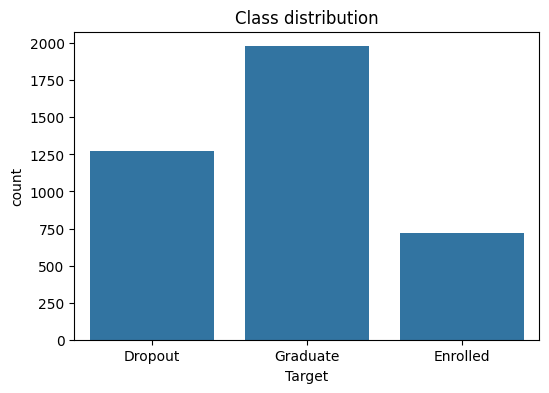

Target
Graduate    1979
Dropout     1273
Enrolled     719
Name: count, dtype: int64


In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Target', data=df)
plt.title('Class distribution')
plt.show()
print(df['Target'].value_counts())




# **Correlation Analysis (heat‑map)**

/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


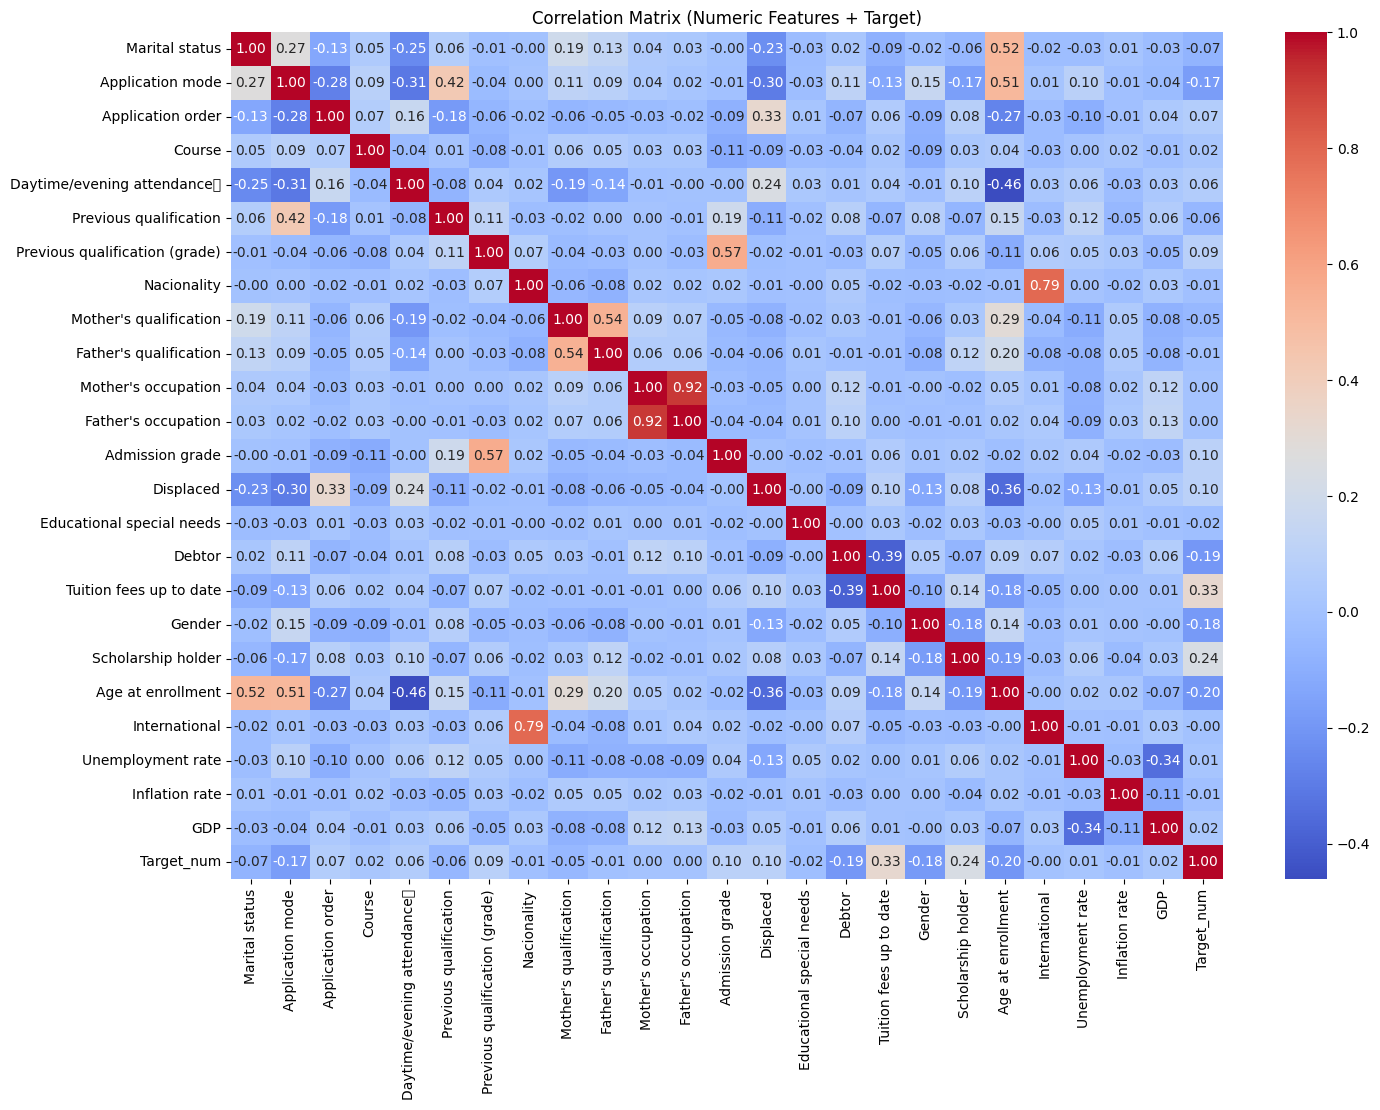

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder


# Encode the target column if it's categorical
df['Target_num'] = LabelEncoder().fit_transform(df['Target'])

corr_matrix = df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(16, 11))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Correlation Matrix (Numeric Features + Target)')
plt.show()


**Corelation Matrix Analysis**

● Strong Redundancies:
     ○ Mother’s vs Father’s occupation (ρ ≈ 0.92) and mother’s vs father’s qualification
(ρ ≈ 0.54–1.00) are nearly duplicate or same. We will now drop one column from each
parental pair to avoid redundancy means duplicacy.

● Moderate Associations:
    ○ Admission grade - Previous qualification grade (ρ ≈ 0.57)
    ○ Age at enrollment - Application order (ρ ≈ 0.51)

● Weak or Negligible Links:
   ○ Most of the other feature–feature and feature–target correlations are almost zero, indicating
It will help us to bring largely unique information.

Based on the above analysis of correlation matrix, we eliminated the redundant parental columns but kept moderately correlated academic and demographic variables, and to maximize our prediction diversity, we have preserved all our other features.



# **Exploratory Data Analysis (EDA)**
**5·1 Descriptive Stats**

In [ ]:
display(df.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Marital status,4001.0,NaN,NaN,NaN,1.172457,0.584595,1.0,1.0,1.0,1.0,6.0
Application mode,3941.0,NaN,NaN,NaN,18.56204,17.453216,1.0,1.0,17.0,39.0,57.0
Application order,3998.0,NaN,NaN,NaN,1.730865,1.310683,0.0,1.0,1.0,2.0,9.0
Course,3959.0,NaN,NaN,NaN,8856.628947,2063.151599,33.0,9085.0,9238.0,9556.0,9991.0
Daytime/evening attendance\t,3984.0,NaN,NaN,NaN,0.892319,0.310016,0.0,1.0,1.0,1.0,1.0
Previous qualification,3990.0,NaN,NaN,NaN,4.525564,10.132748,1.0,1.0,1.0,1.0,43.0
Previous qualification (grade),3952.0,NaN,NaN,NaN,132.690056,13.226582,95.0,125.0,133.1,140.0,190.0
Nacionality,3978.0,NaN,NaN,NaN,1.860985,7.040422,1.0,1.0,1.0,1.0,109.0
Mother's qualification,4010.0,NaN,NaN,NaN,19.482294,15.620541,1.0,2.0,19.0,37.0,44.0
Father's qualification,3974.0,NaN,NaN,NaN,22.20307,15.382146,1.0,3.0,19.0,37.0,44.0


Define Numerical and categorical features

In [ ]:
cat_feats = [
    "Marital status",
    "Application mode",
    "Course",
    "Daytime/evening attendance\t",
    "Previous qualification",
    "Nacionality",
    "Mother's qualification",
    "Father's qualification",
    "Mother's occupation",
    "Father's occupation",
    "Displaced",
    "Educational special needs",
    "Debtor",
    "Tuition fees up to date",
    "Gender",
    "Scholarship holder",
    "International"
]

num_feats = [
    "Application order",
    "Previous qualification (grade)",
    "Admission grade",
    "Age at enrollment",
    "Unemployment rate",
    "Inflation rate",
    "GDP"
]

**5·2 Numeric Distributions & Outliers**

### **Summary satistics of Numerical Features**

In [ ]:
numerical_data = df[num_feats]
numerical_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Application order,3998.0,1.730865,1.310683,0.00,1.0,1.00,2.00,9.00
Previous qualification (grade),3952.0,132.690056,13.226582,95.00,125.0,133.10,140.00,190.00
Admission grade,3962.0,126.903609,14.506892,95.00,117.8,126.10,134.60,190.00
Age at enrollment,3980.0,23.227638,7.608241,17.00,19.0,20.00,25.00,70.00
Unemployment rate,3995.0,11.575394,2.665618,7.60,9.4,11.10,13.90,16.20
Inflation rate,4002.0,1.228286,1.380863,-0.80,0.3,1.40,2.60,3.70
GDP,3968.0,0.017656,2.274384,-4.06,-1.7,0.32,1.79,3.51


In [ ]:
numerical_data.var()

,0
Application order,1.717891
Previous qualification (grade),174.942475
Admission grade,210.449911
Age at enrollment,57.885338
Unemployment rate,7.105521
Inflation rate,1.906783
GDP,5.172822


In [ ]:
numerical_data.skew()

,0
Application order,1.872101
Previous qualification (grade),0.307966
Admission grade,0.515351
Age at enrollment,2.091374
Unemployment rate,0.207260
Inflation rate,0.255016
GDP,-0.400097


**Skewness Interpretation:**

Application order (1.871): There is a significant right-skew, with some students having higher application order numbers but the majority have lower numbers.

Previous qualification grade (0.307): Fairly symmetrical – slight positive skew, close to normal distribution.
Admission grade (0.499): Moderately right-skewed; some students have significantly higher grades than the mean, but more students have grades below it.

Age at enrollment (2.074): Strong right-skew – most students are younger; some older students create a long right tail.
The unemployment rate (0.210) is near to normal and has a somewhat right-skewed distribution.

Inflation rate (0.262): Slightly right-skewed – fairly balanced distribution with minor positive skew.

GDP (-0.407): Moderately left-skewed, with more observations above the mean; the GDP numbers of several nations are noticeably lower.



### **Summary satistics of Categorical Features**

In [ ]:
categorical_data = df[cat_feats]
categorical_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Marital status,4001.0,1.172457,0.584595,1.0,1.0,1.0,1.0,6.0
Application mode,3941.0,18.562040,17.453216,1.0,1.0,17.0,39.0,57.0
Course,3959.0,8856.628947,2063.151599,33.0,9085.0,9238.0,9556.0,9991.0
Daytime/evening attendance\t,3984.0,0.892319,0.310016,0.0,1.0,1.0,1.0,1.0
Previous qualification,3990.0,4.525564,10.132748,1.0,1.0,1.0,1.0,43.0
Nacionality,3978.0,1.860985,7.040422,1.0,1.0,1.0,1.0,109.0
Mother's qualification,4010.0,19.482294,15.620541,1.0,2.0,19.0,37.0,44.0
Father's qualification,3974.0,22.203070,15.382146,1.0,3.0,19.0,37.0,44.0
Mother's occupation,3988.0,10.895687,26.304799,0.0,4.0,5.0,9.0,194.0
Father's occupation,3999.0,10.910978,25.003303,0.0,4.0,7.0,9.0,194.0


In [ ]:
categorical_data.var()

,0
Marital status,3.417512e-01
Application mode,3.046147e+02
Course,4.256595e+06
Daytime/evening attendance\t,9.610971e-02
Previous qualification,1.026726e+02
Nacionality,4.956754e+01
Mother's qualification,2.440013e+02
Father's qualification,2.366104e+02
Mother's occupation,6.919425e+02
Father's occupation,6.251652e+02


In [ ]:
categorical_data.skew()

,0
Marital status,4.429740
Application mode,0.398201
Course,-3.808295
Daytime/evening attendance\t,-2.532235
Previous qualification,2.900447
Nacionality,10.924248
Mother's qualification,0.010805
Father's qualification,-0.291581
Mother's occupation,5.383512
Father's occupation,5.488079


In [ ]:
categorical_data.nunique()

,0
Marital status,6
Application mode,18
Course,17
Daytime/evening attendance\t,2
Previous qualification,17
Nacionality,20
Mother's qualification,28
Father's qualification,34
Mother's occupation,32
Father's occupation,43


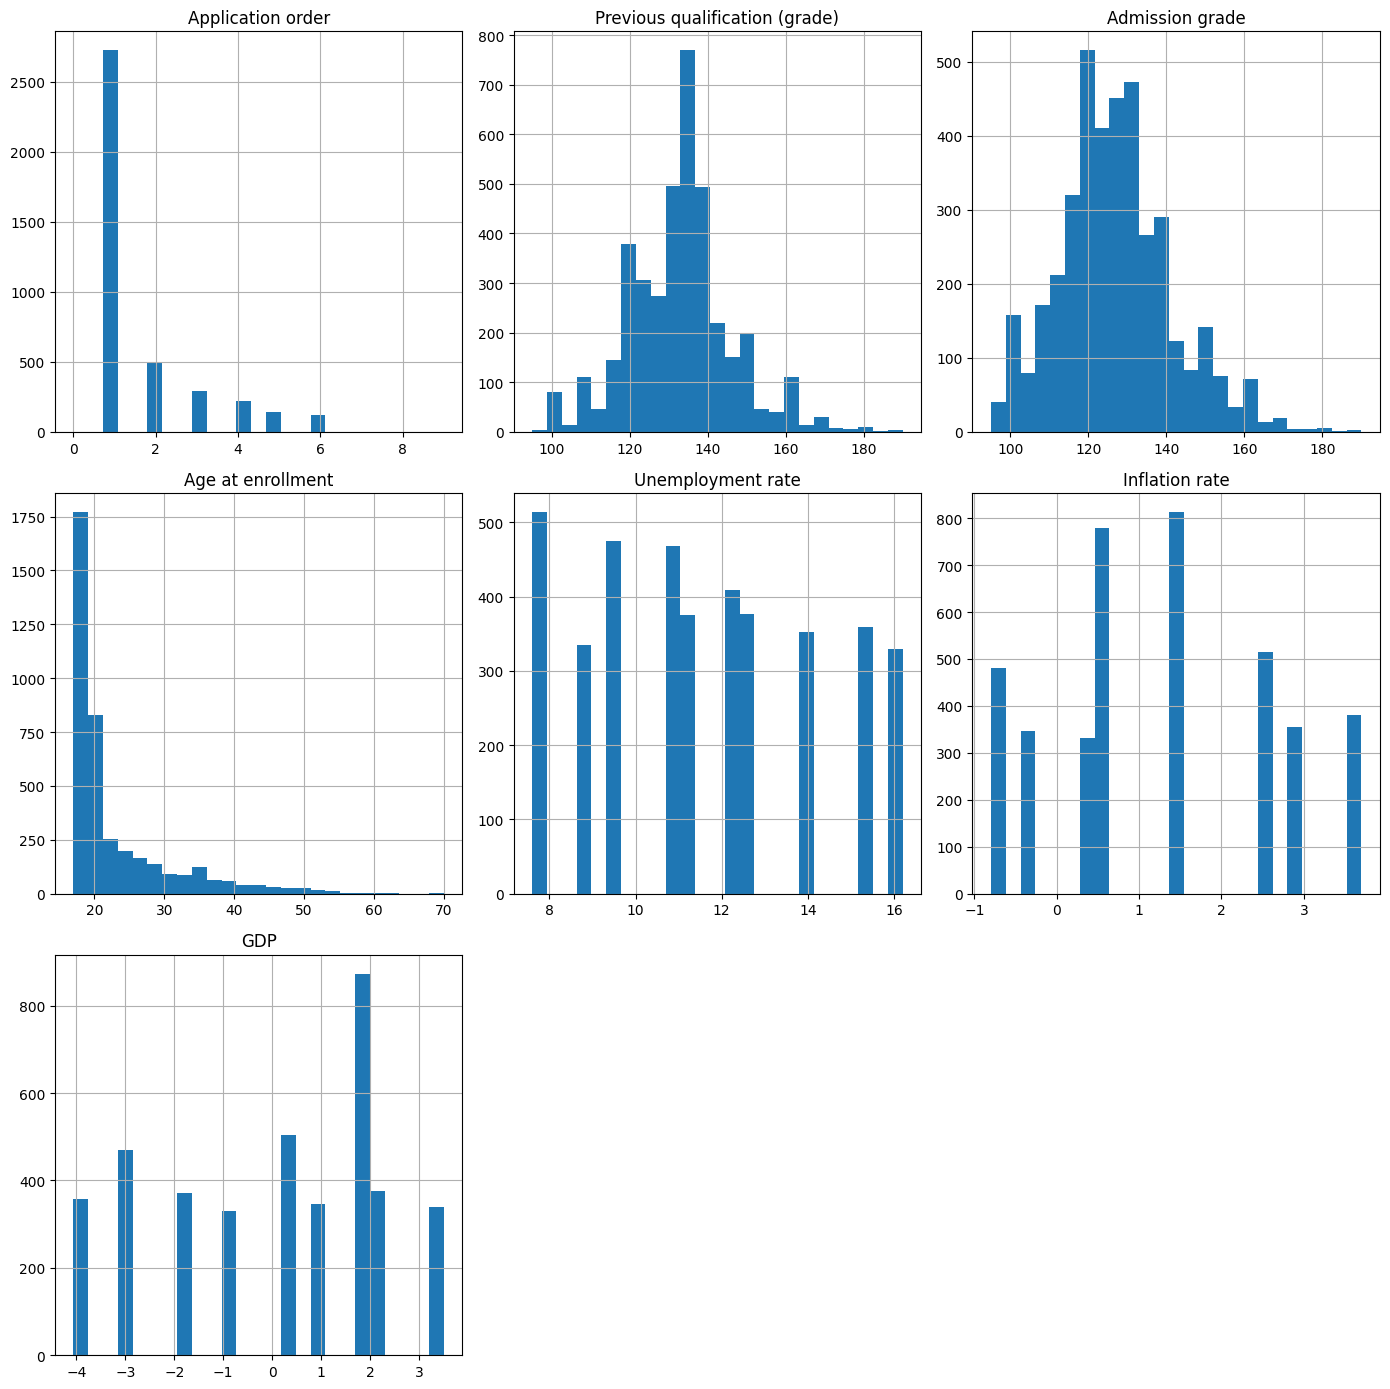

In [ ]:
df[num_feats].hist(figsize=(14,14), bins=25)
plt.tight_layout(); plt.show()


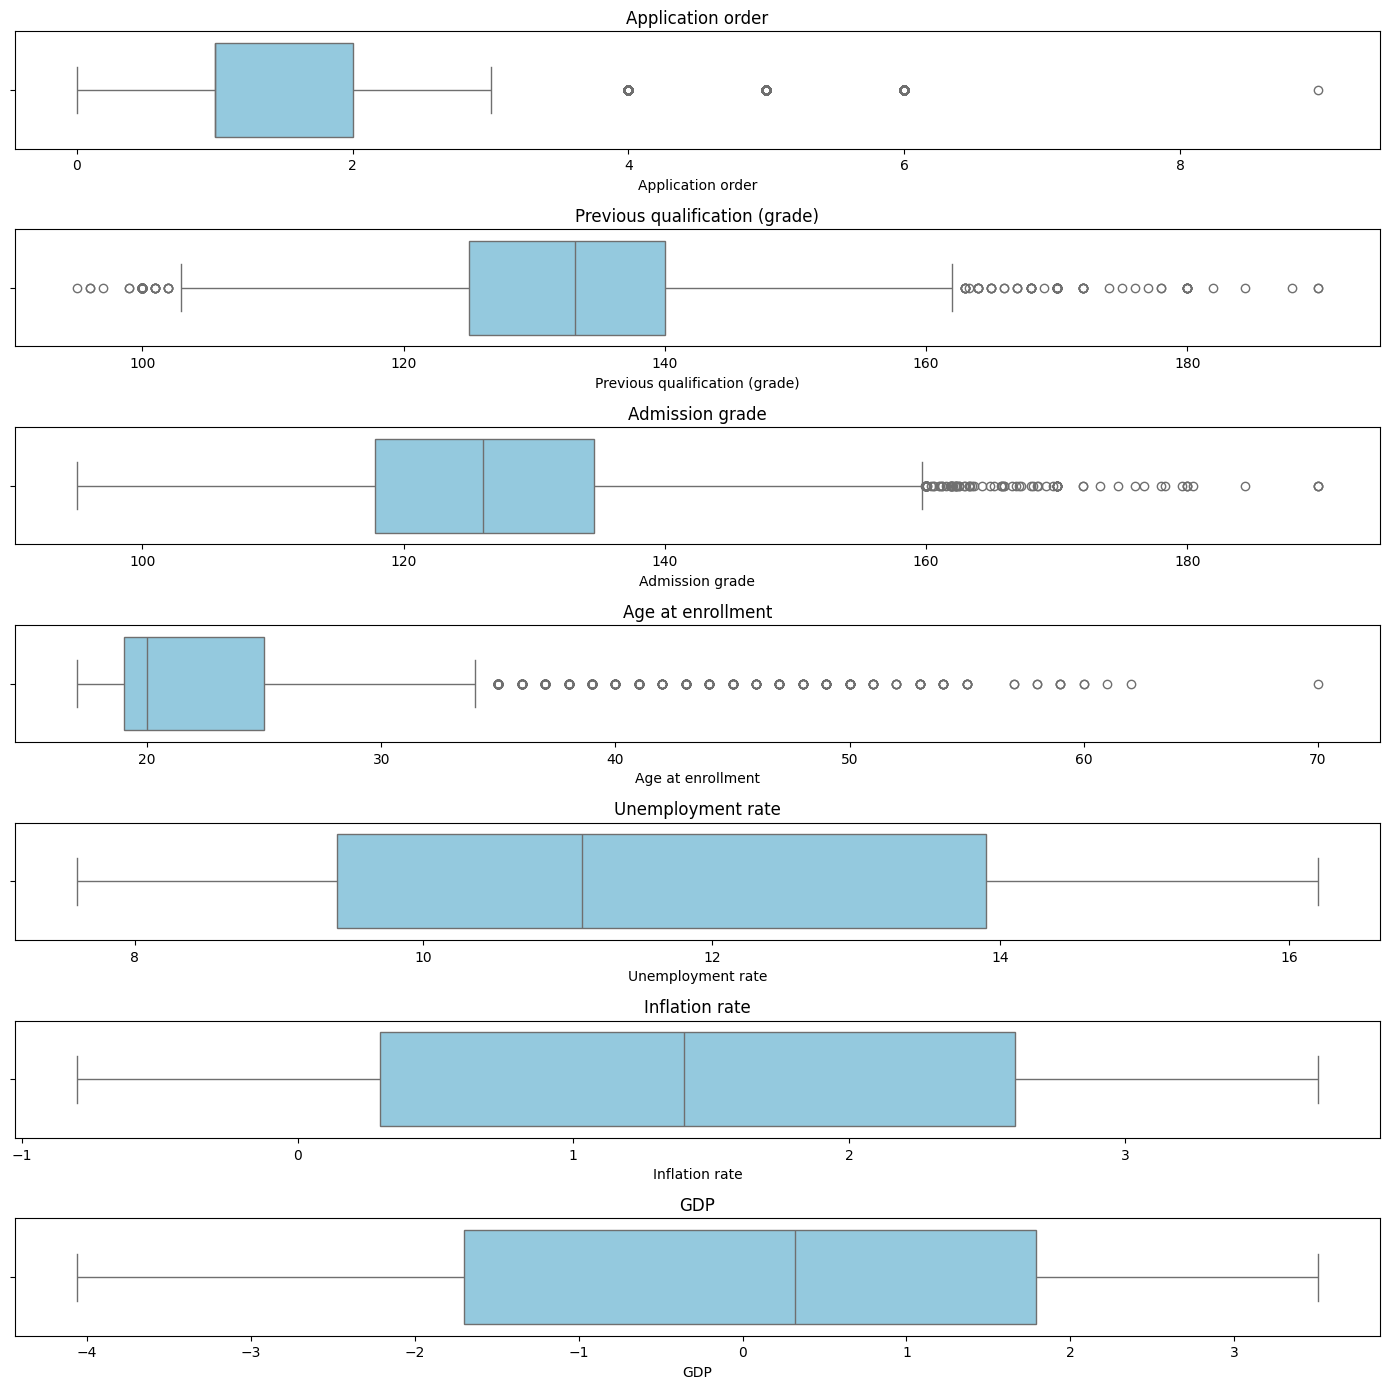

In [ ]:
# Box‑plots
plt.figure(figsize=(14, 2*len(num_feats)))
for i, col in enumerate(num_feats, 1):
    plt.subplot(len(num_feats), 1, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(col)
plt.tight_layout(); plt.show()

Distribution and outer analysis:
The dataset showed some imbalances and mild outliers.Most features looked normal, but a few needed adjustments. Binary features (like Debtor, Scholarship holder) were mostly one-sided, some rare categories were grouped as “Other,” and grades were slightly skewed but fixed with scaling. In the age group,there are many young students but also some older ones. Economic features (like GDP, inflation) were used as numbers or grouped.Overall, no severe outliers were found, and preprocessing steps ensured stable modeling.




**Categorical Level Counts**

In [ ]:
cat_feats

['Marital status',
 'Application mode',
 'Course',
 'Daytime/evening attendance\t',
 'Previous qualification',
 'Nacionality',
 "Mother's qualification",
 "Father's qualification",
 "Mother's occupation",
 "Father's occupation",
 'Displaced',
 'Educational special needs',
 'Debtor',
 'Tuition fees up to date',
 'Gender',
 'Scholarship holder',
 'International']

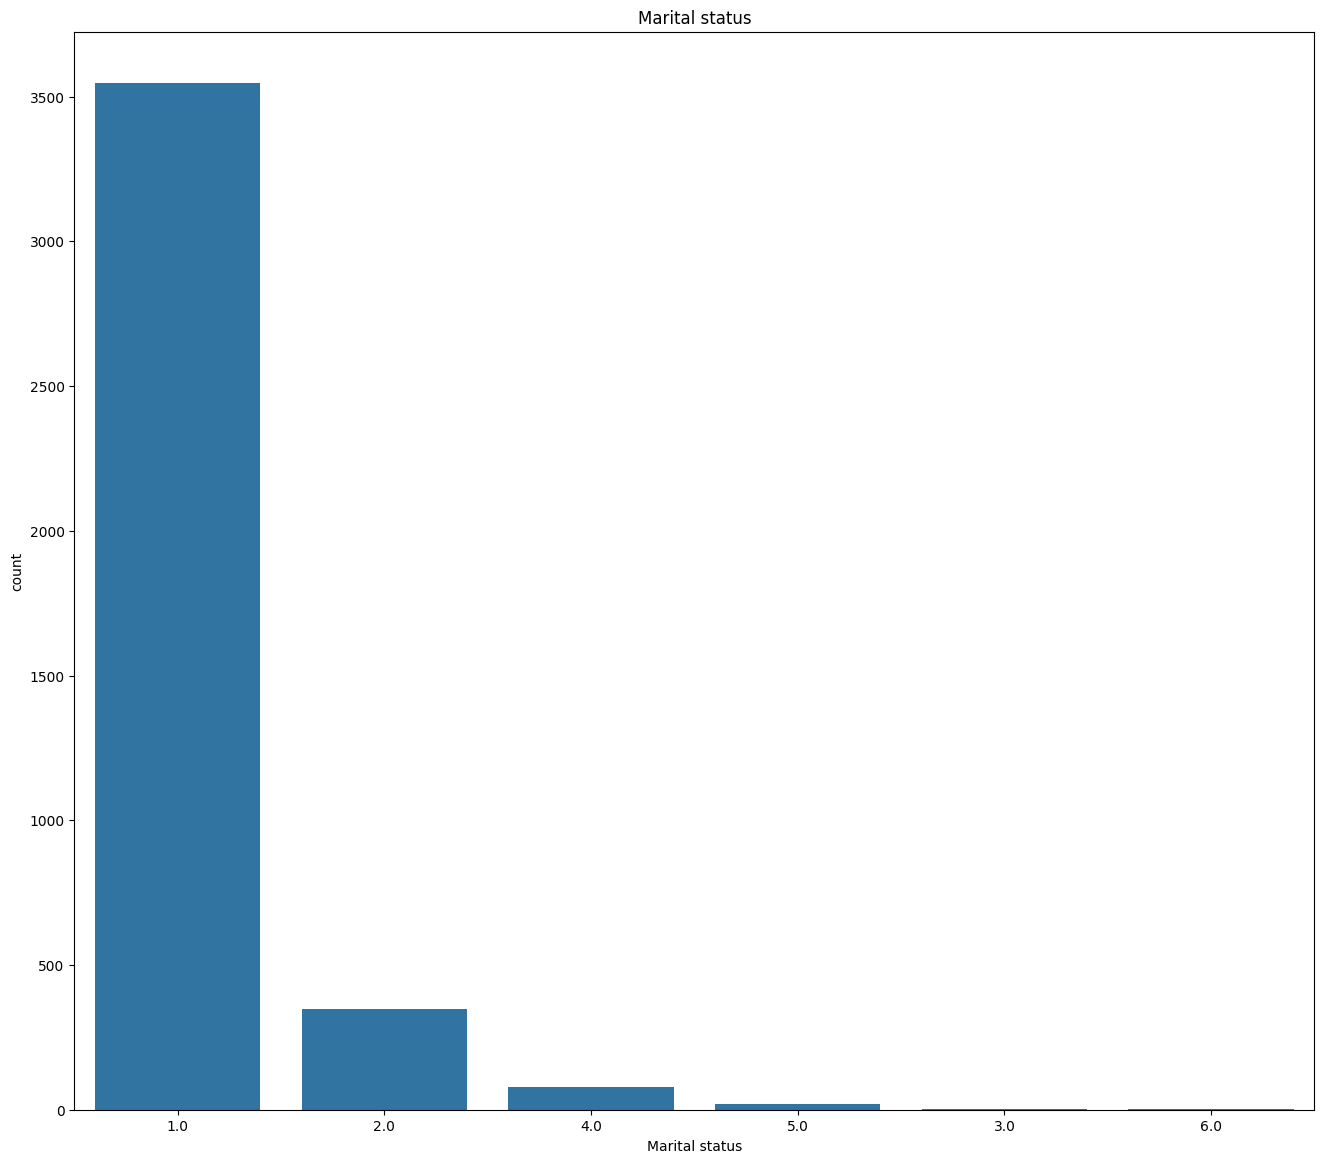

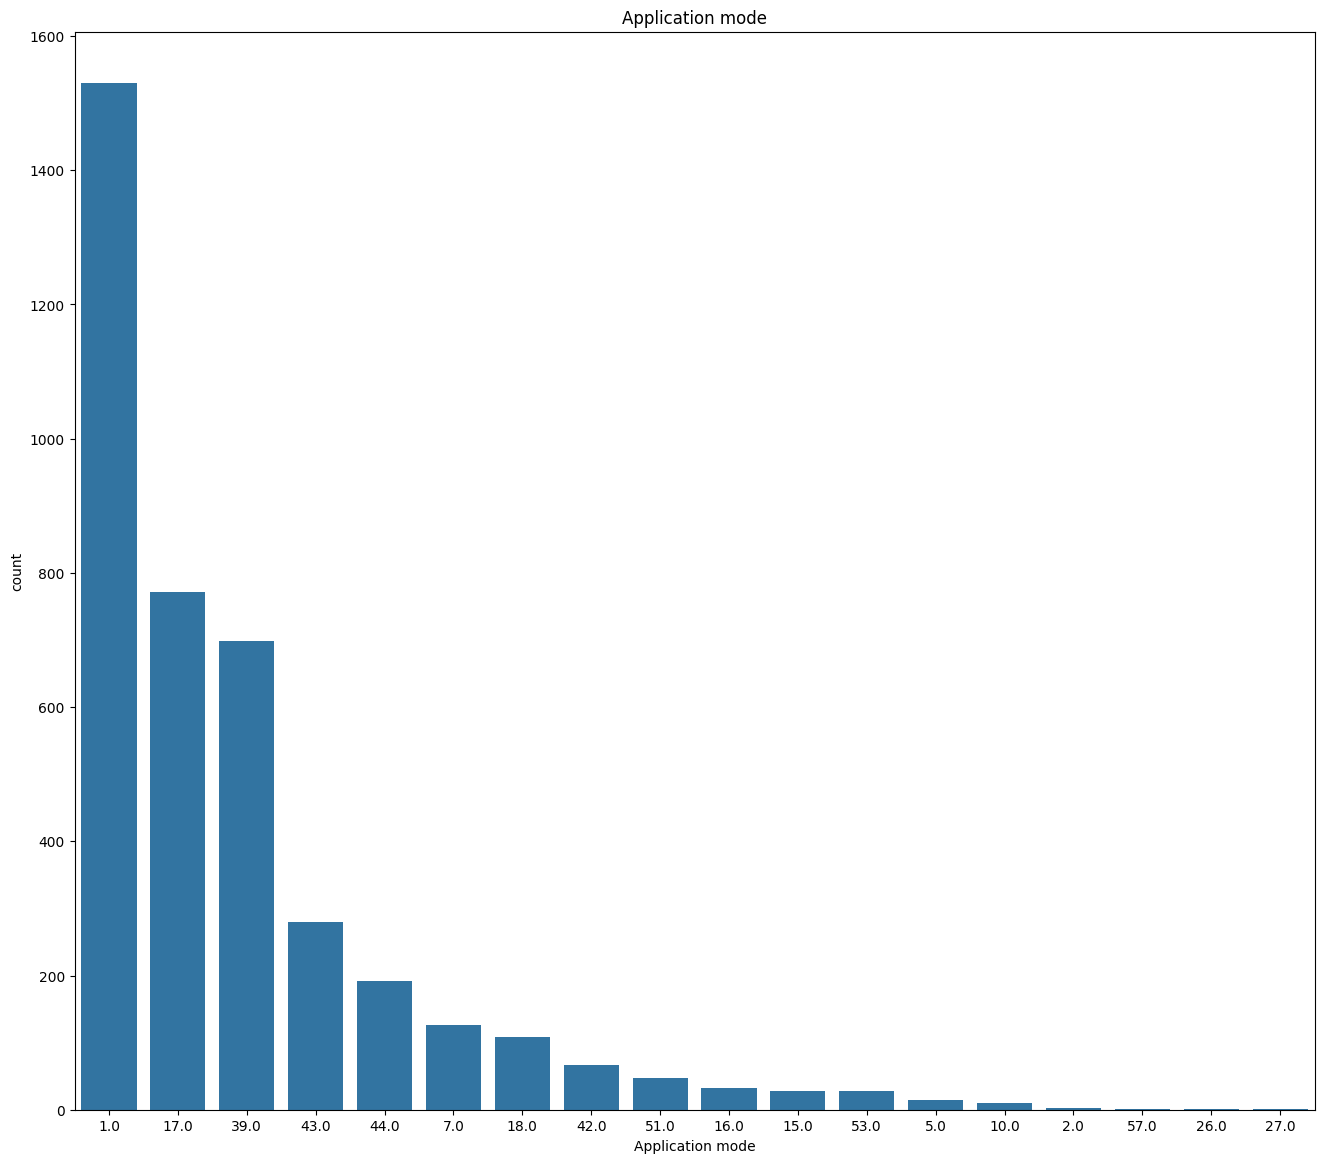

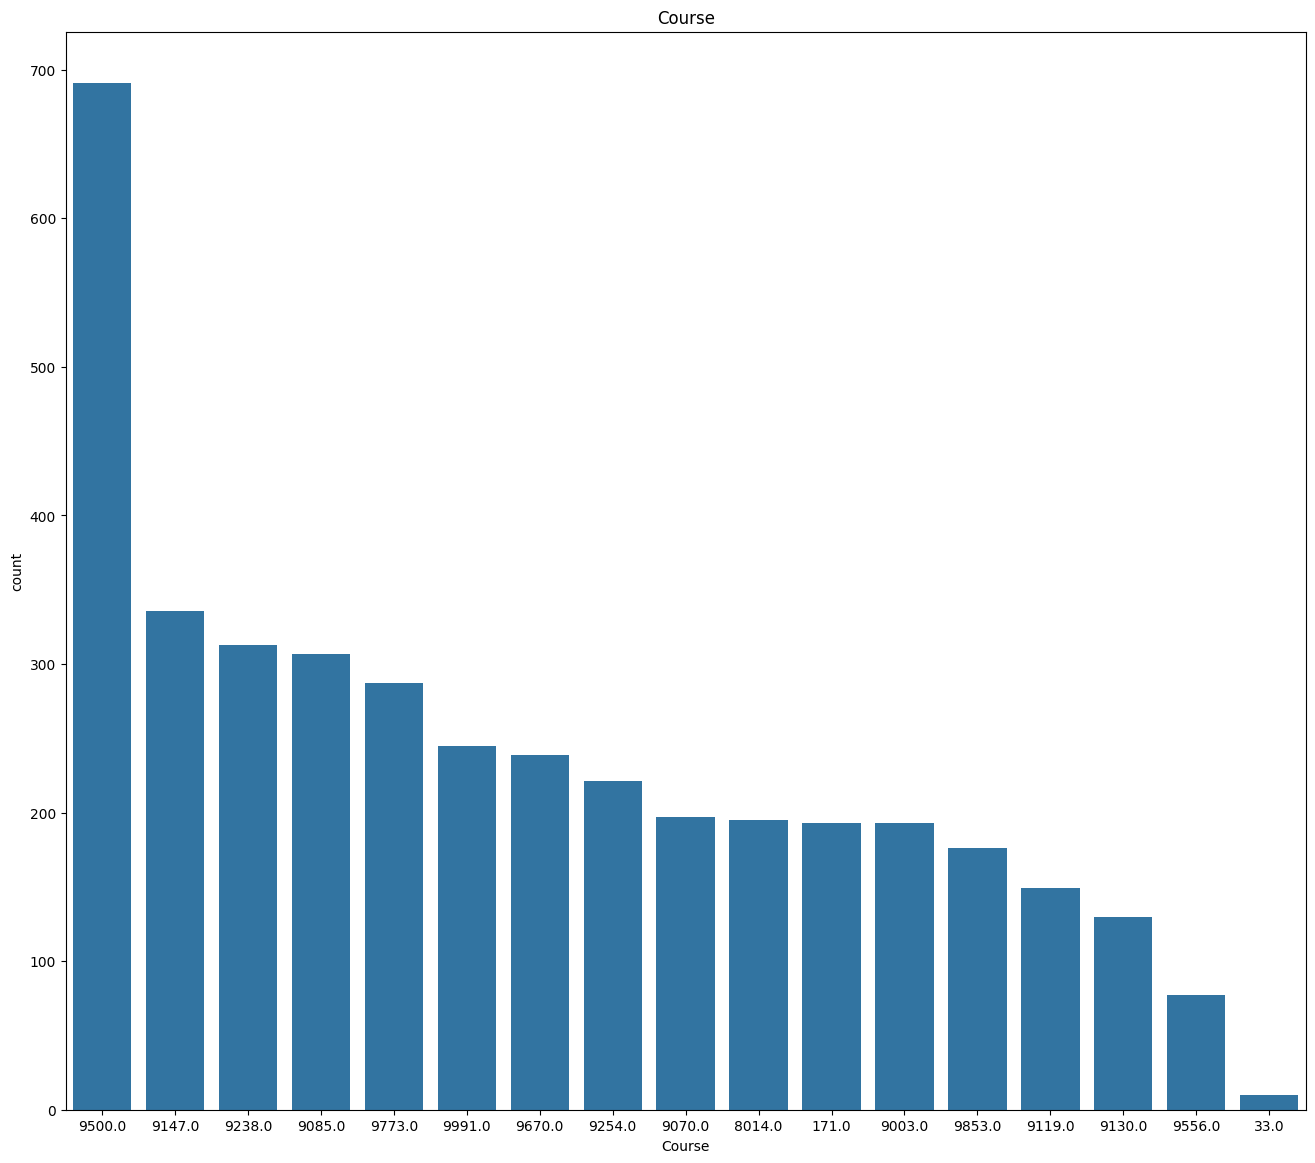

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


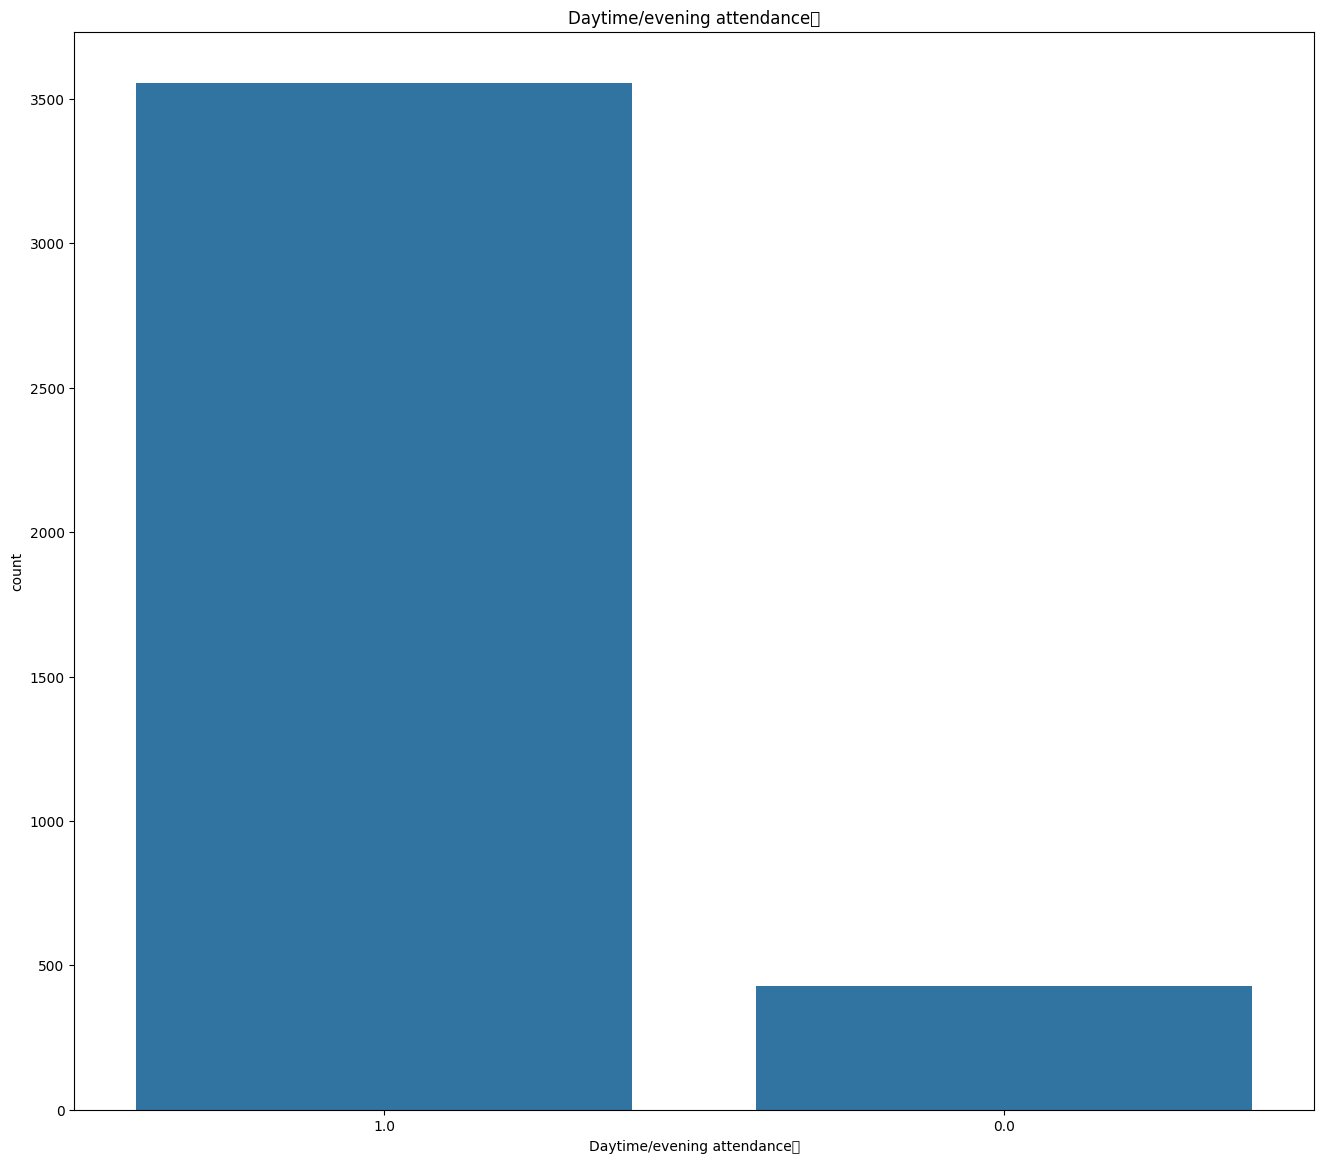

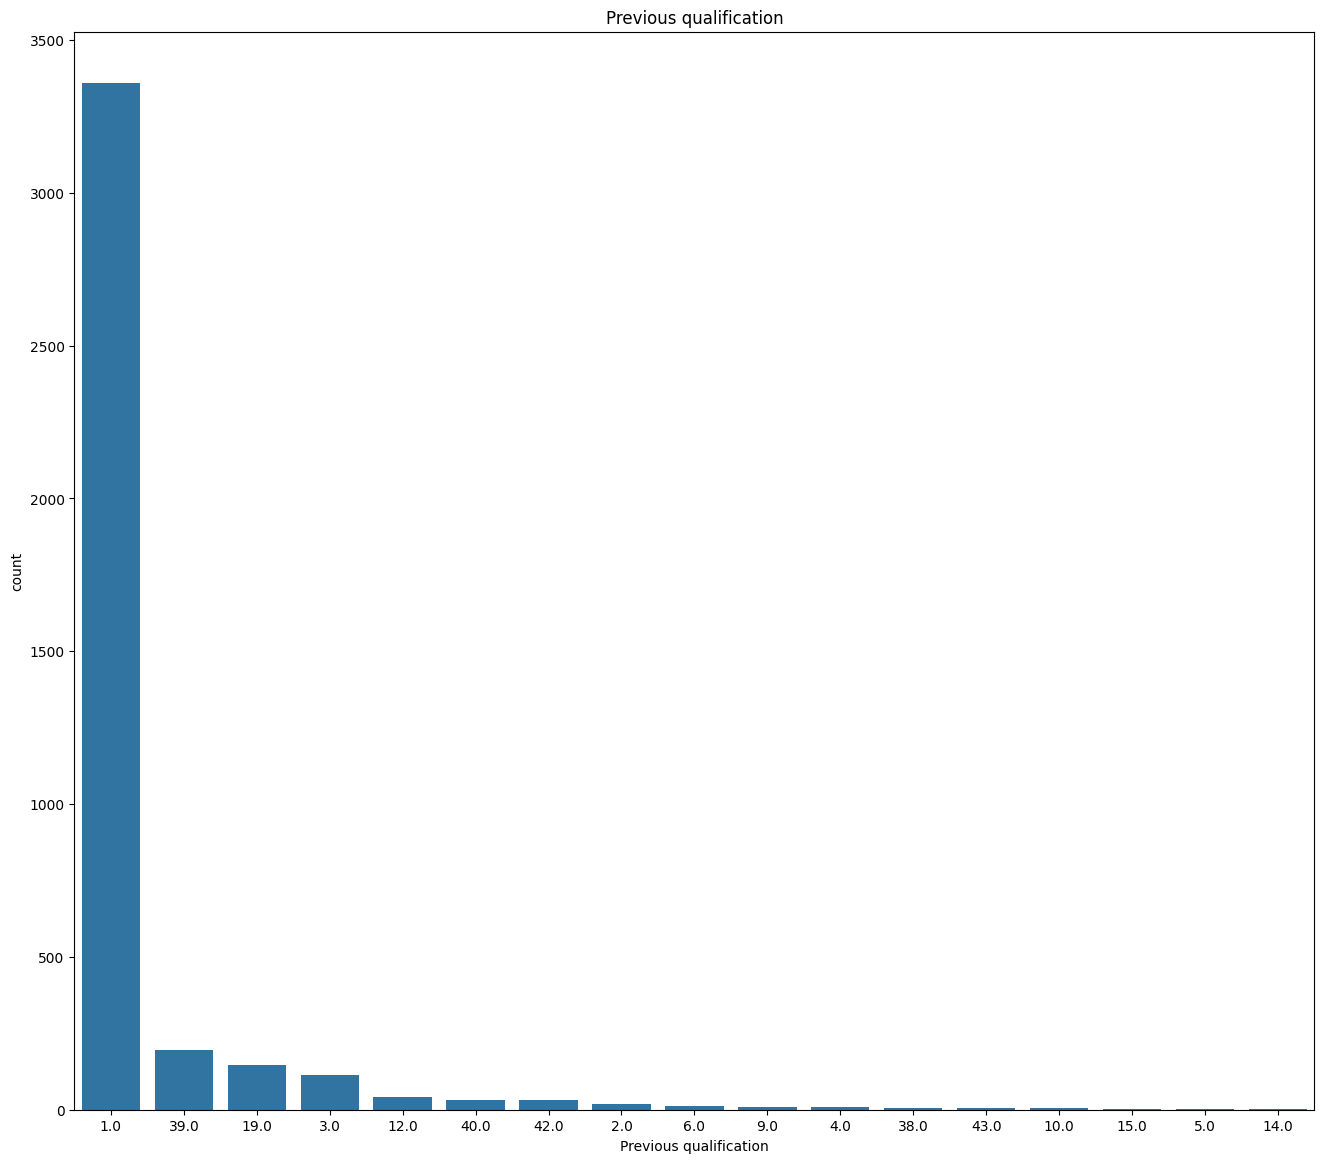

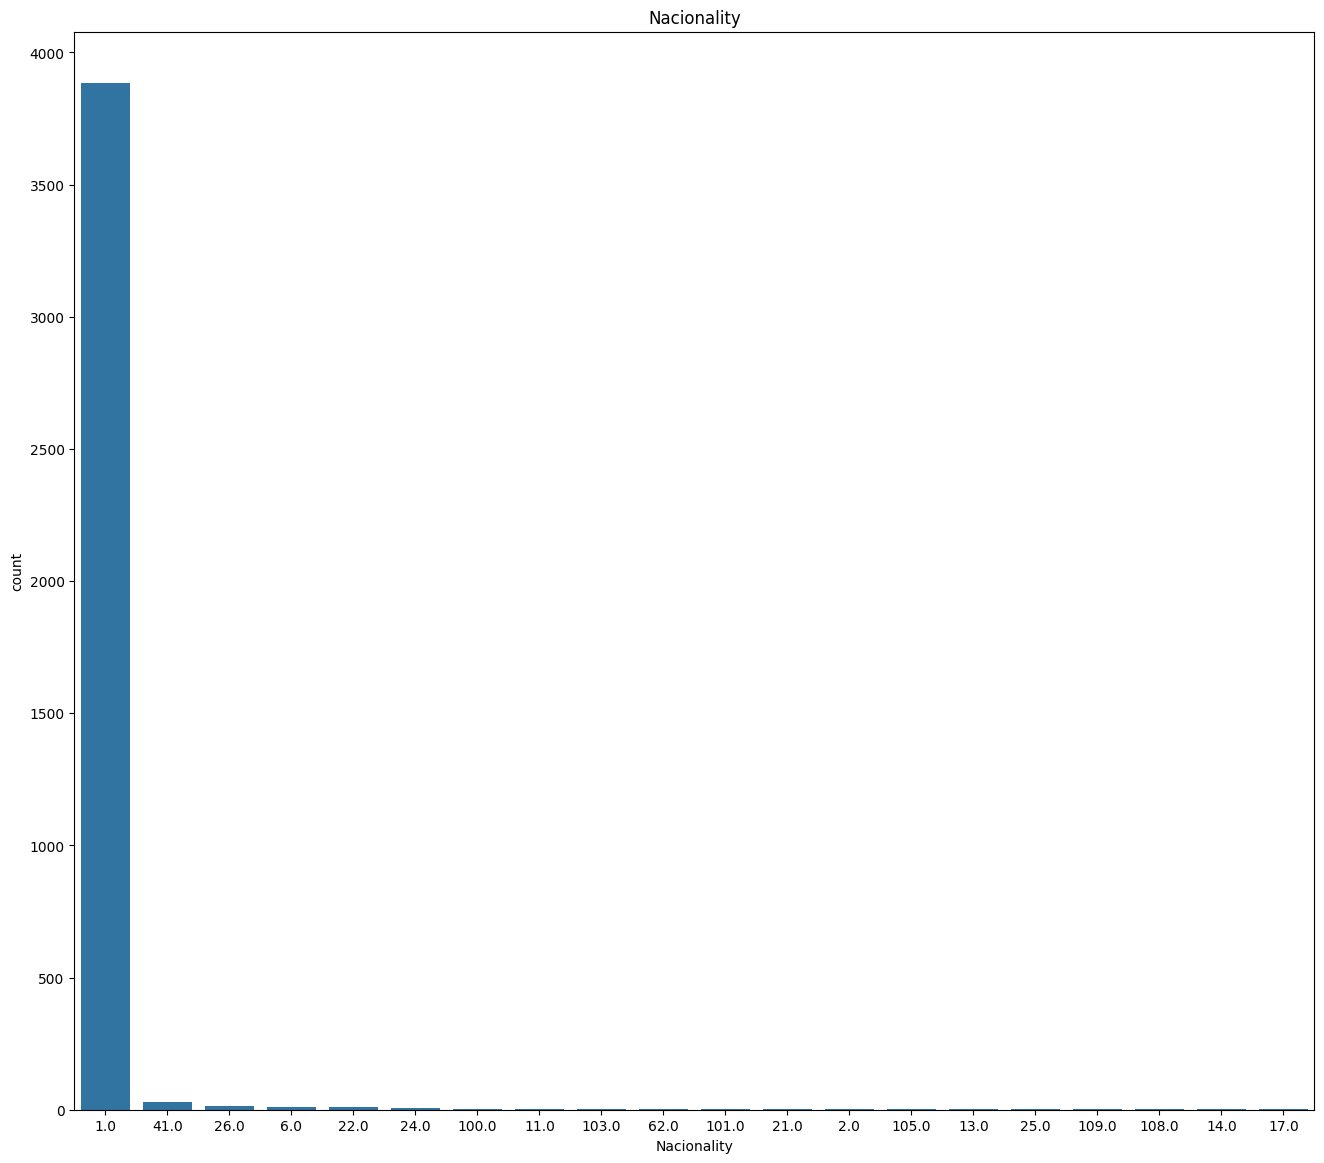

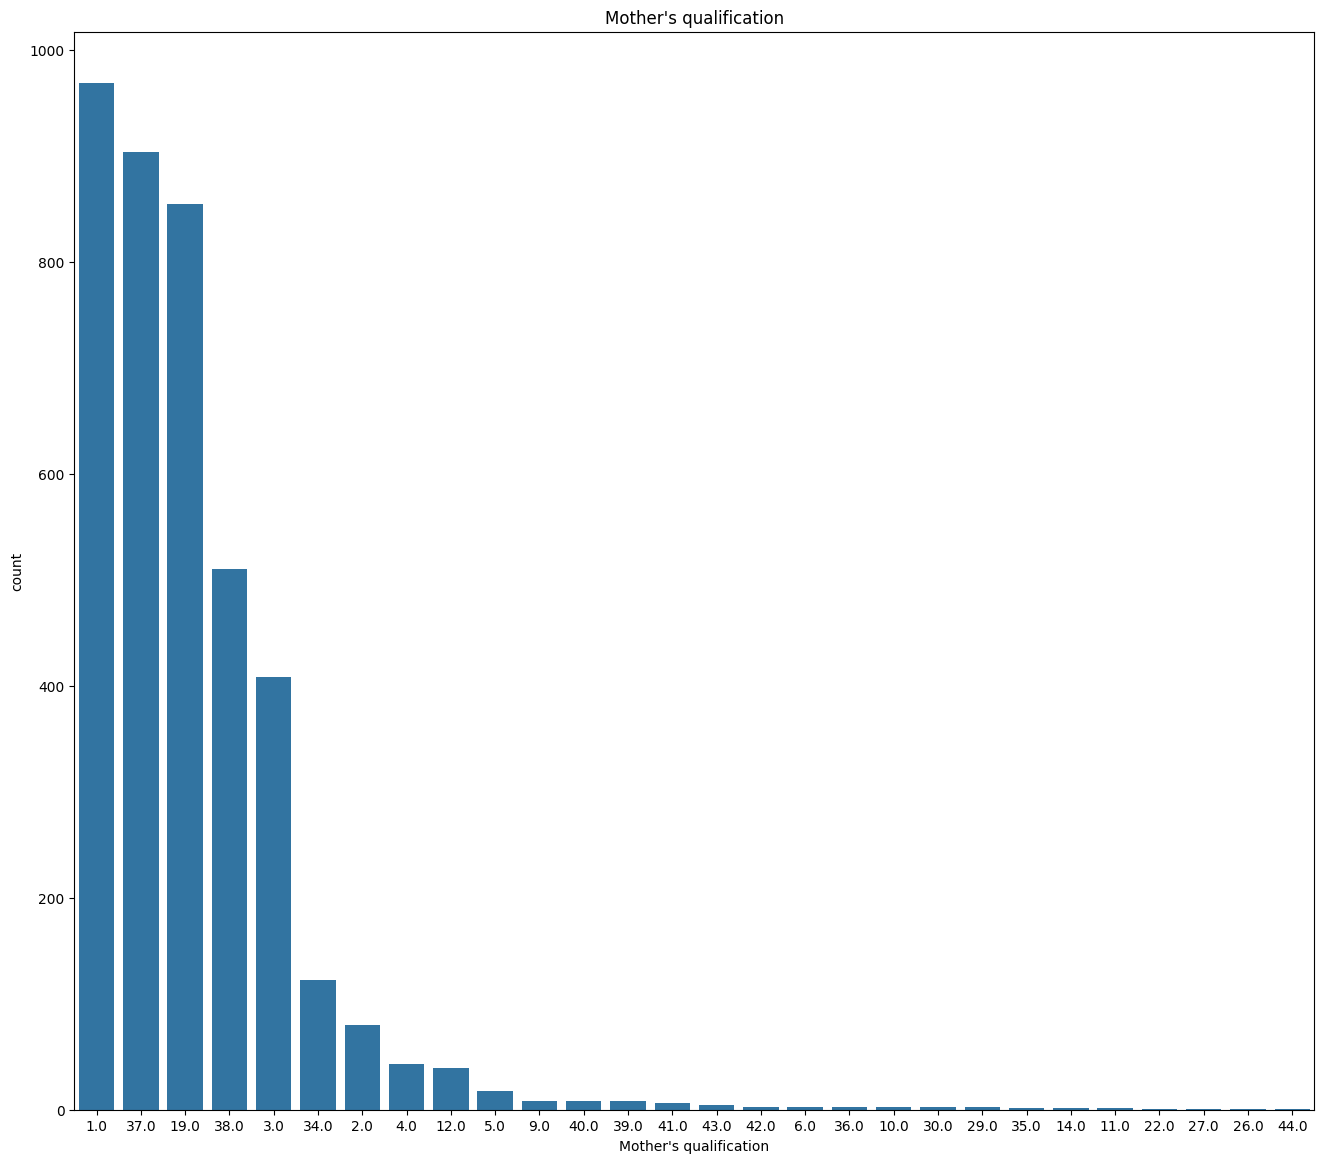

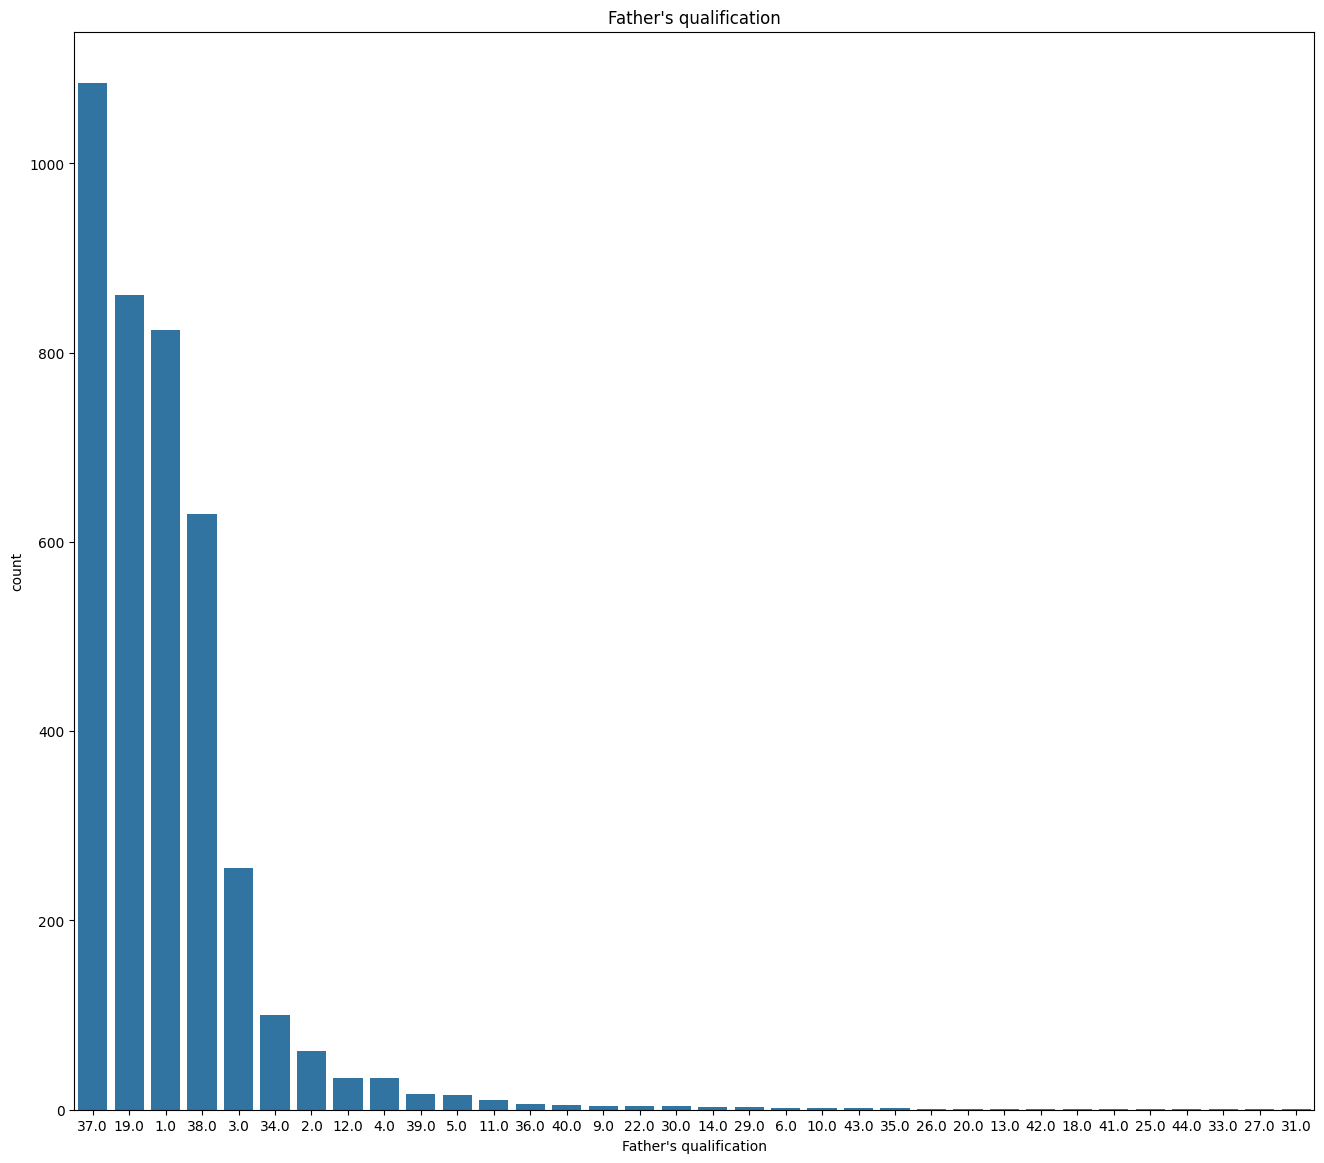

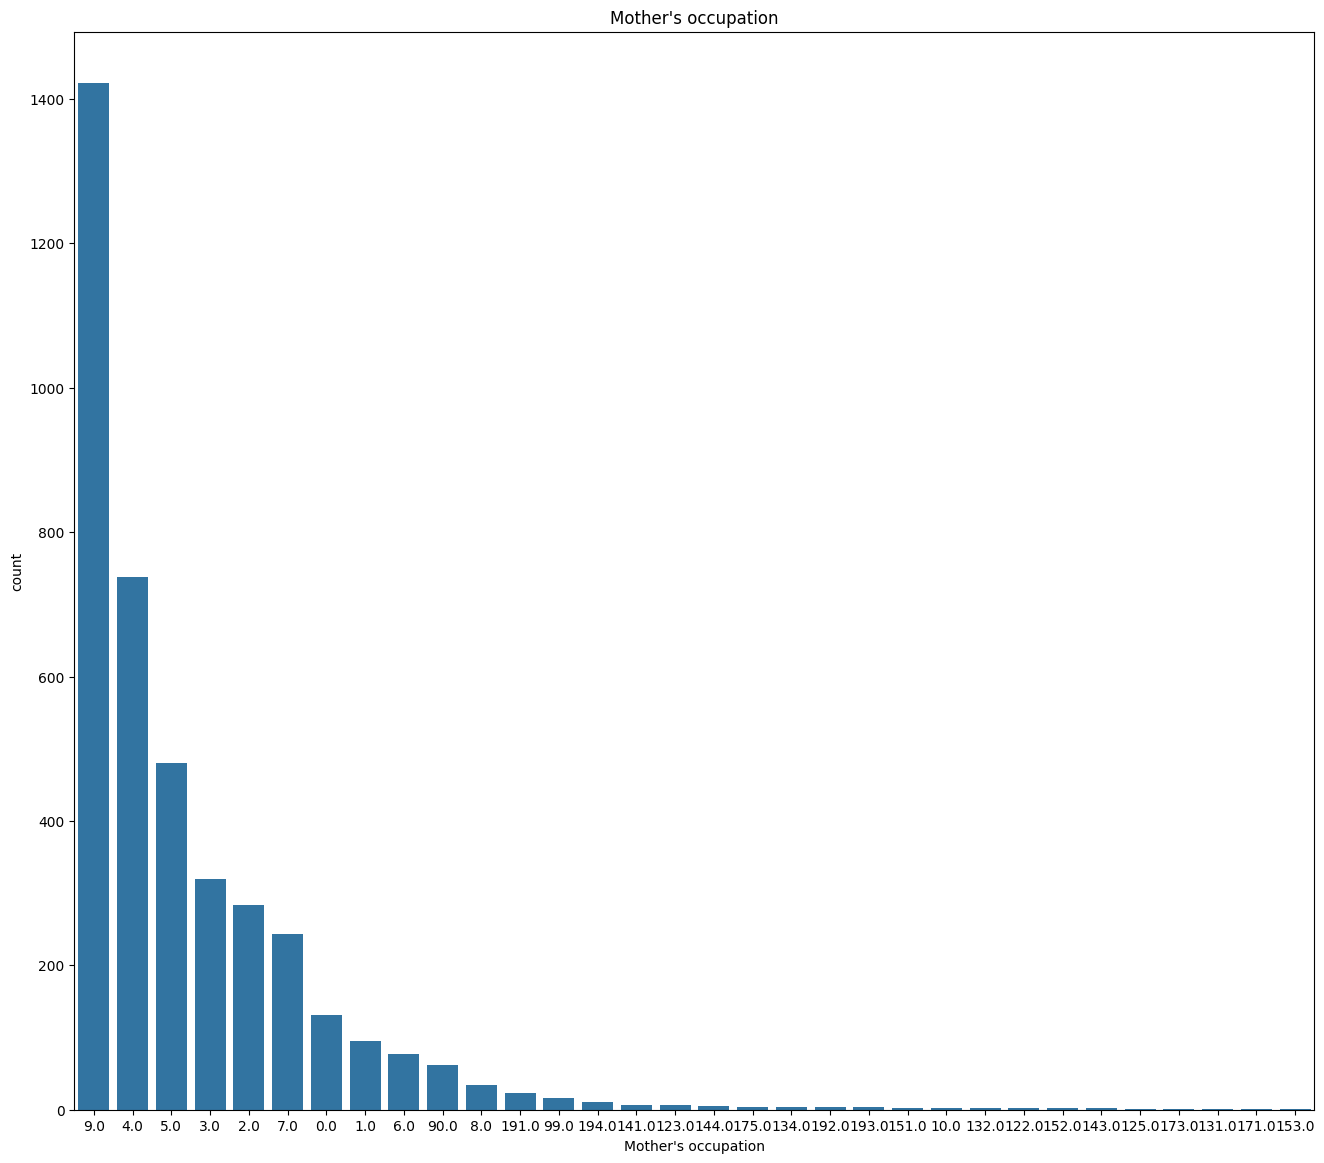

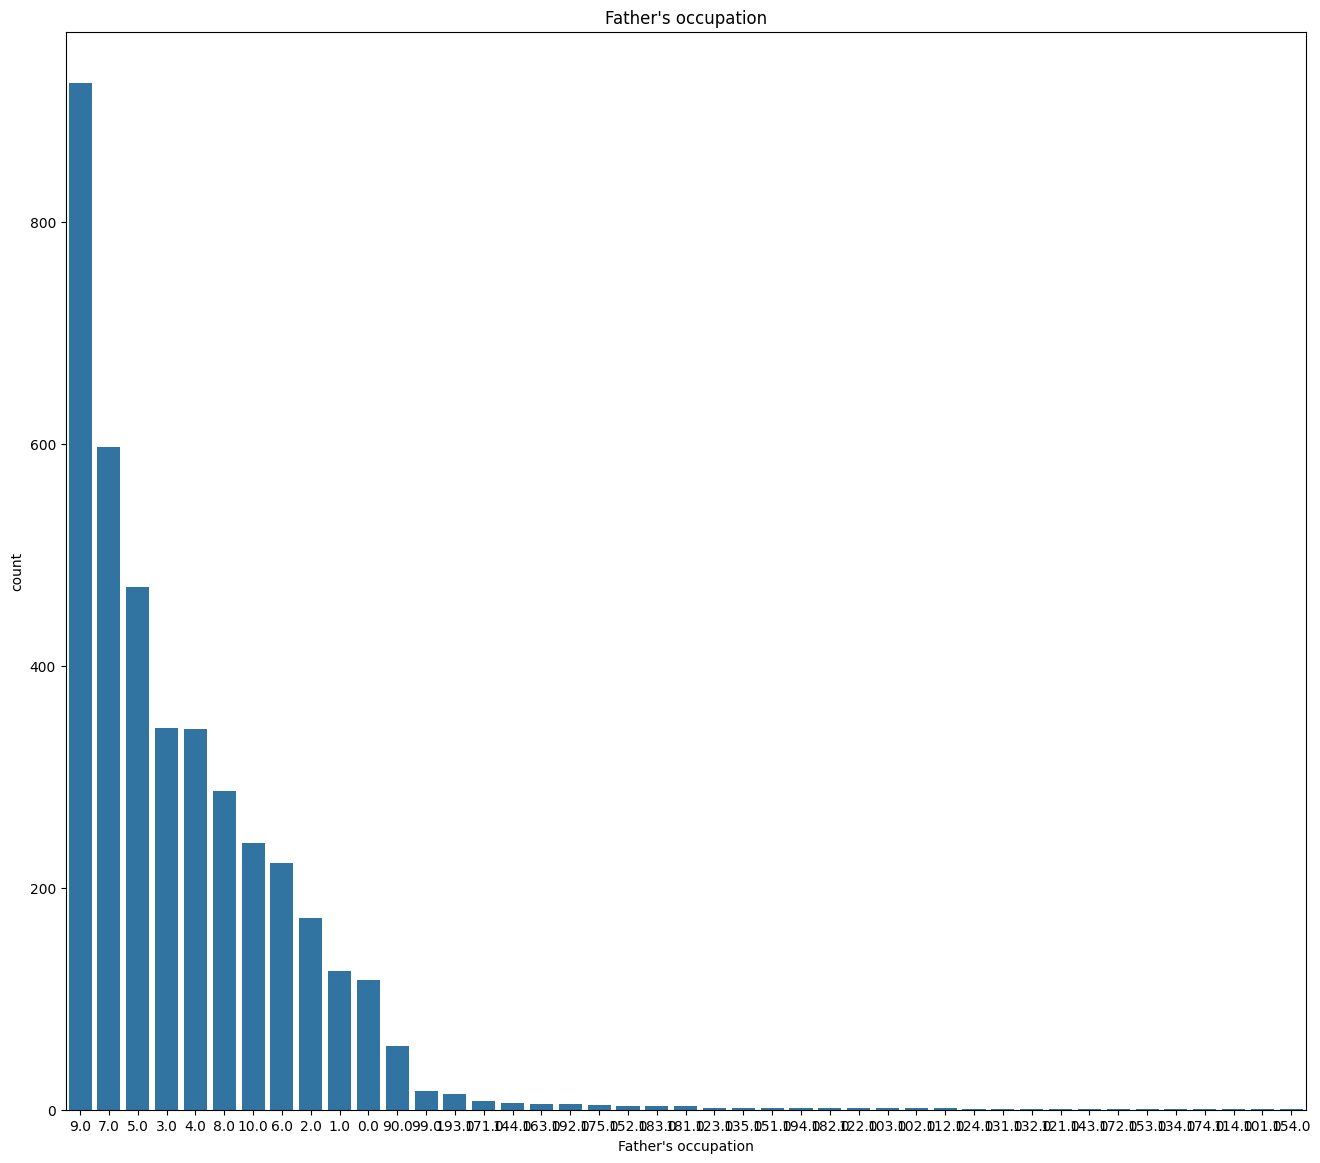

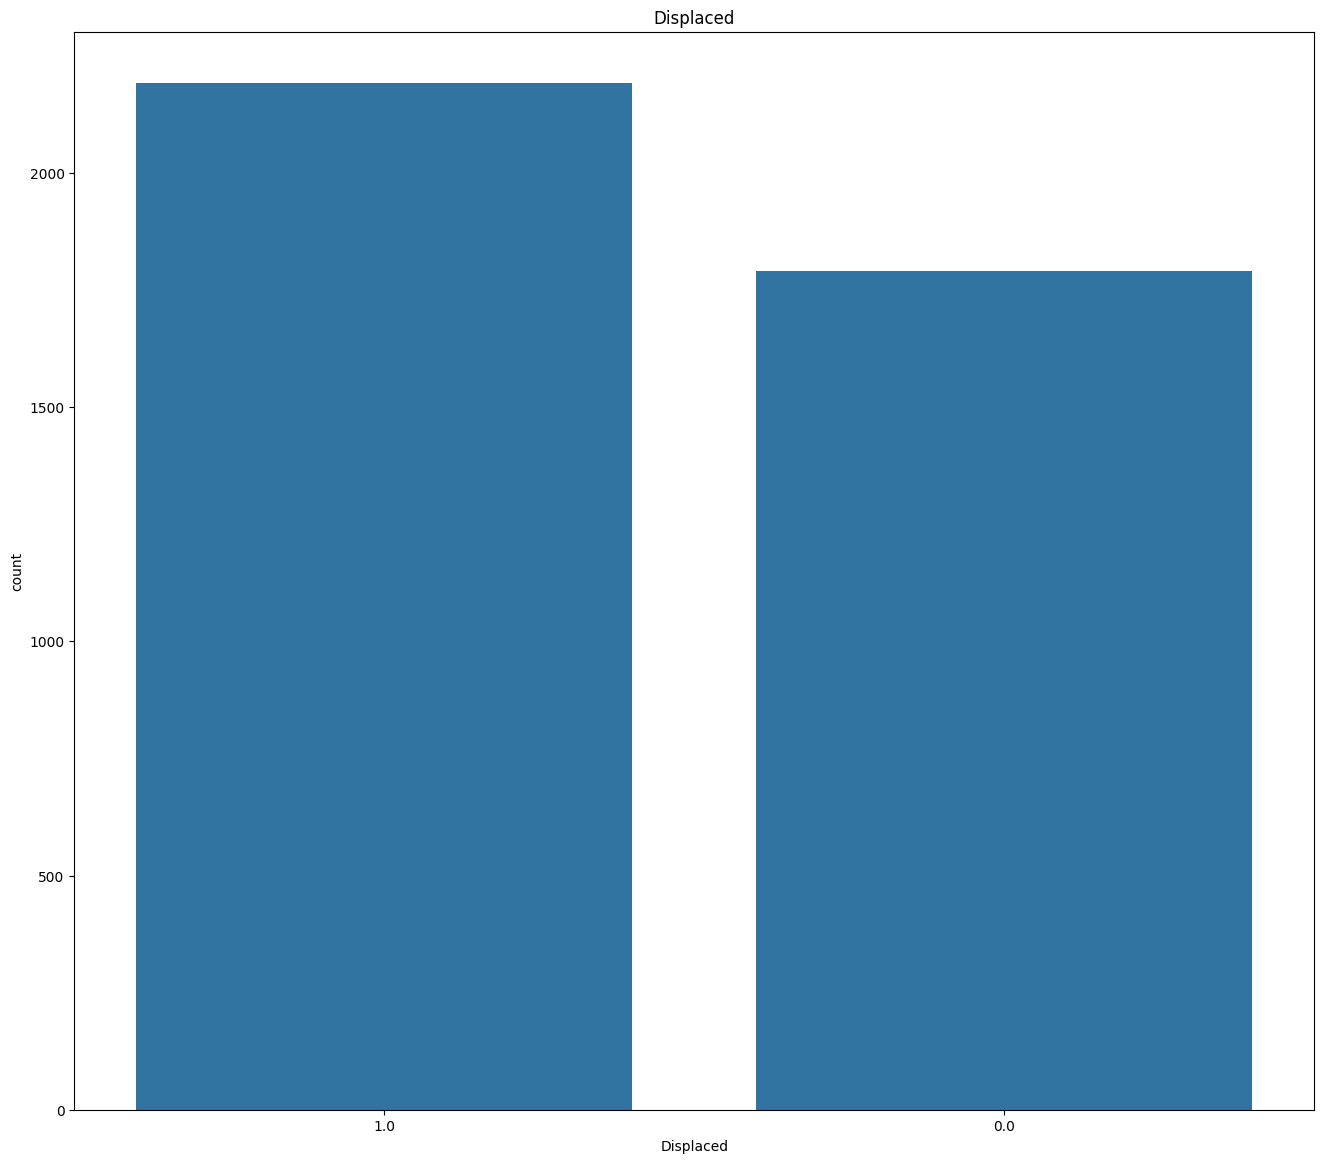

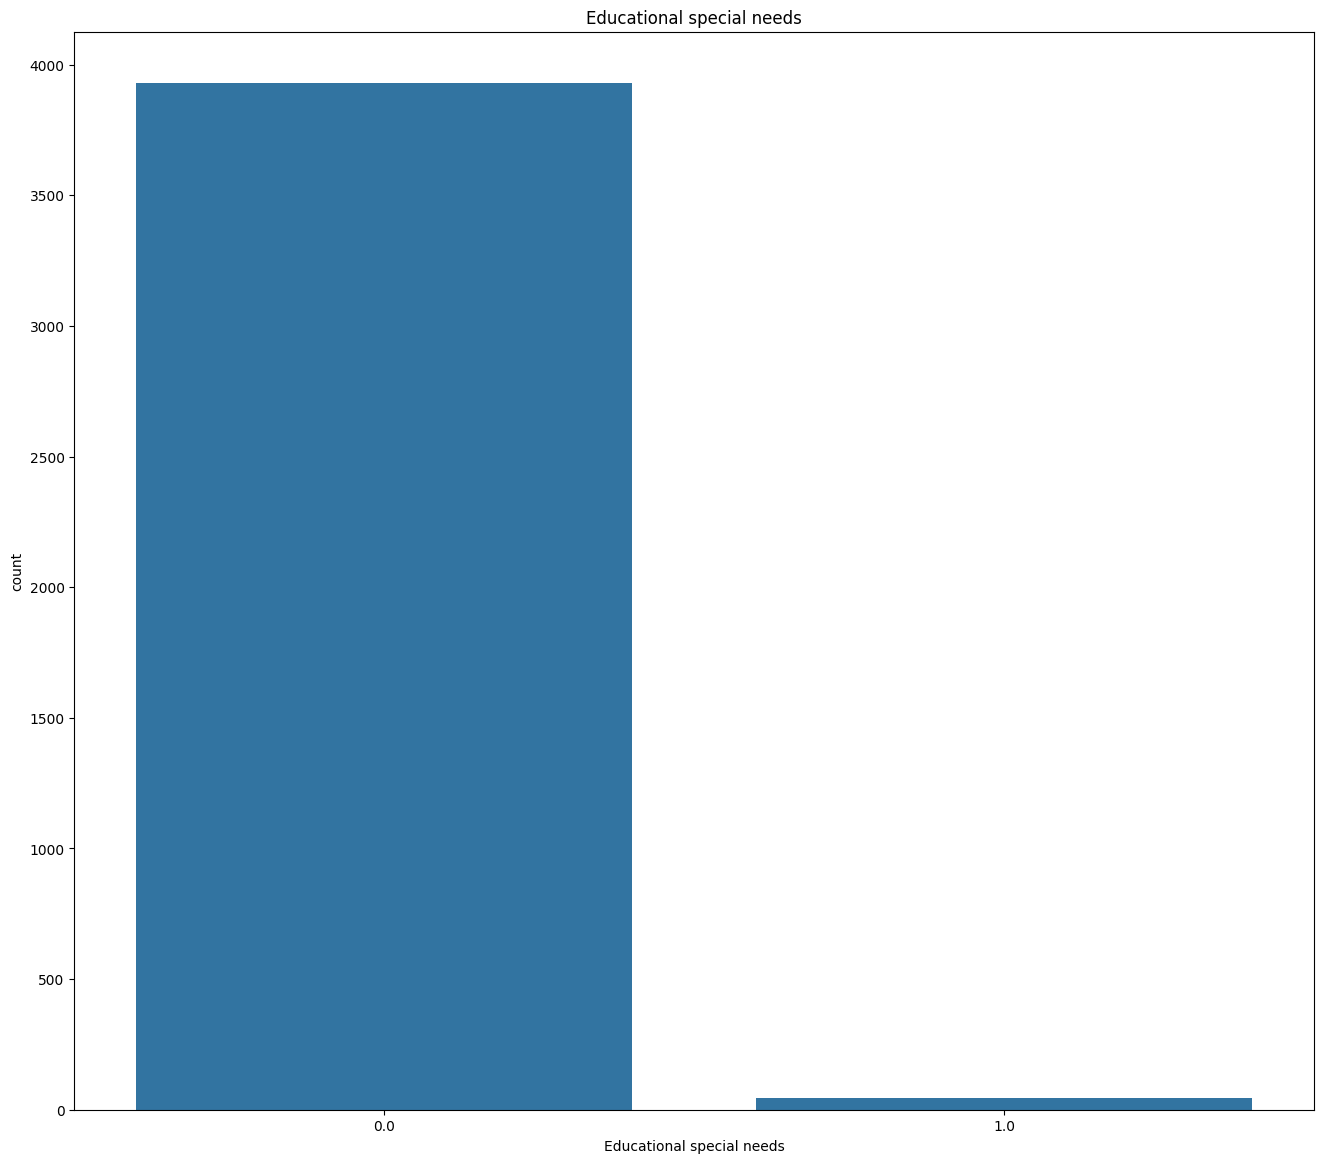

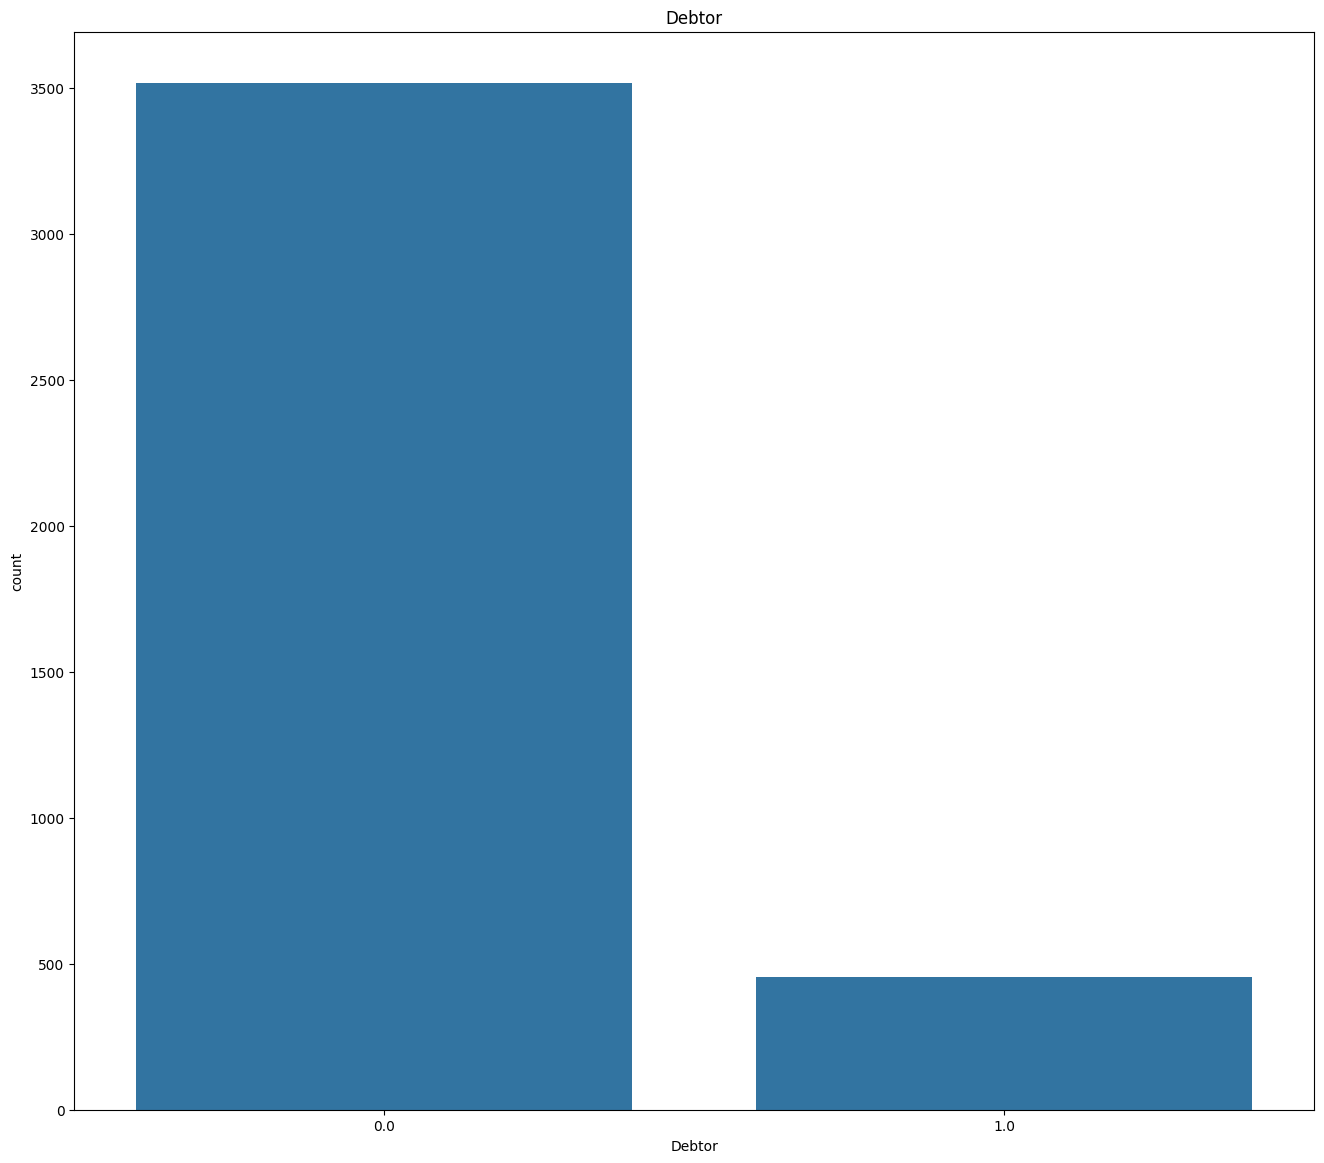

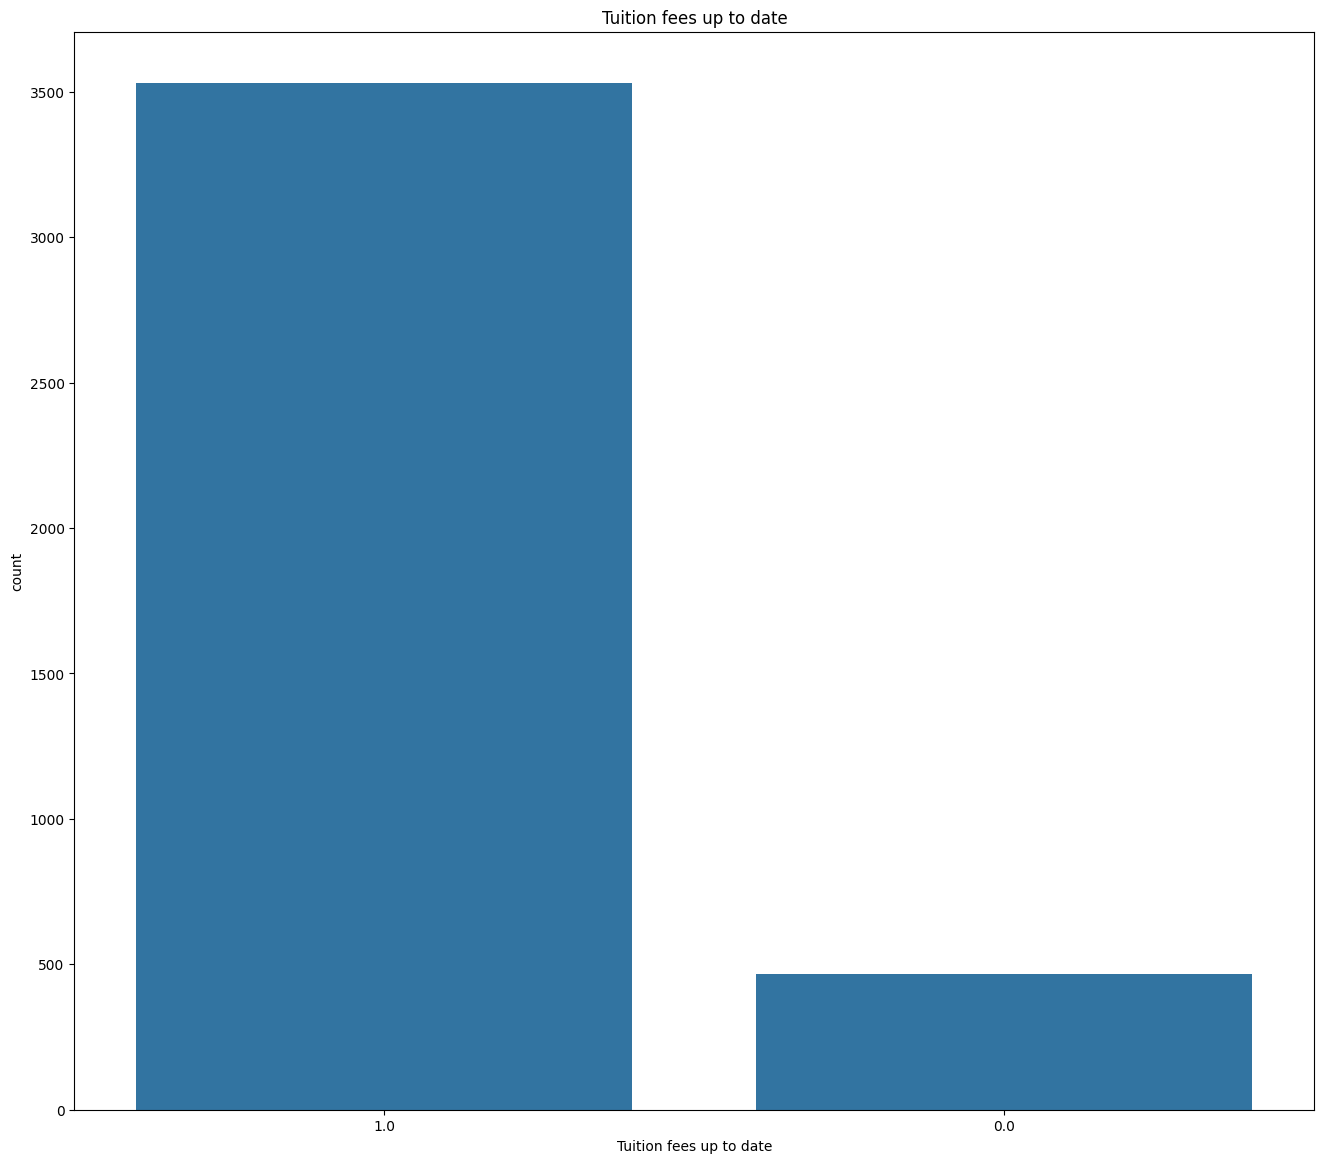

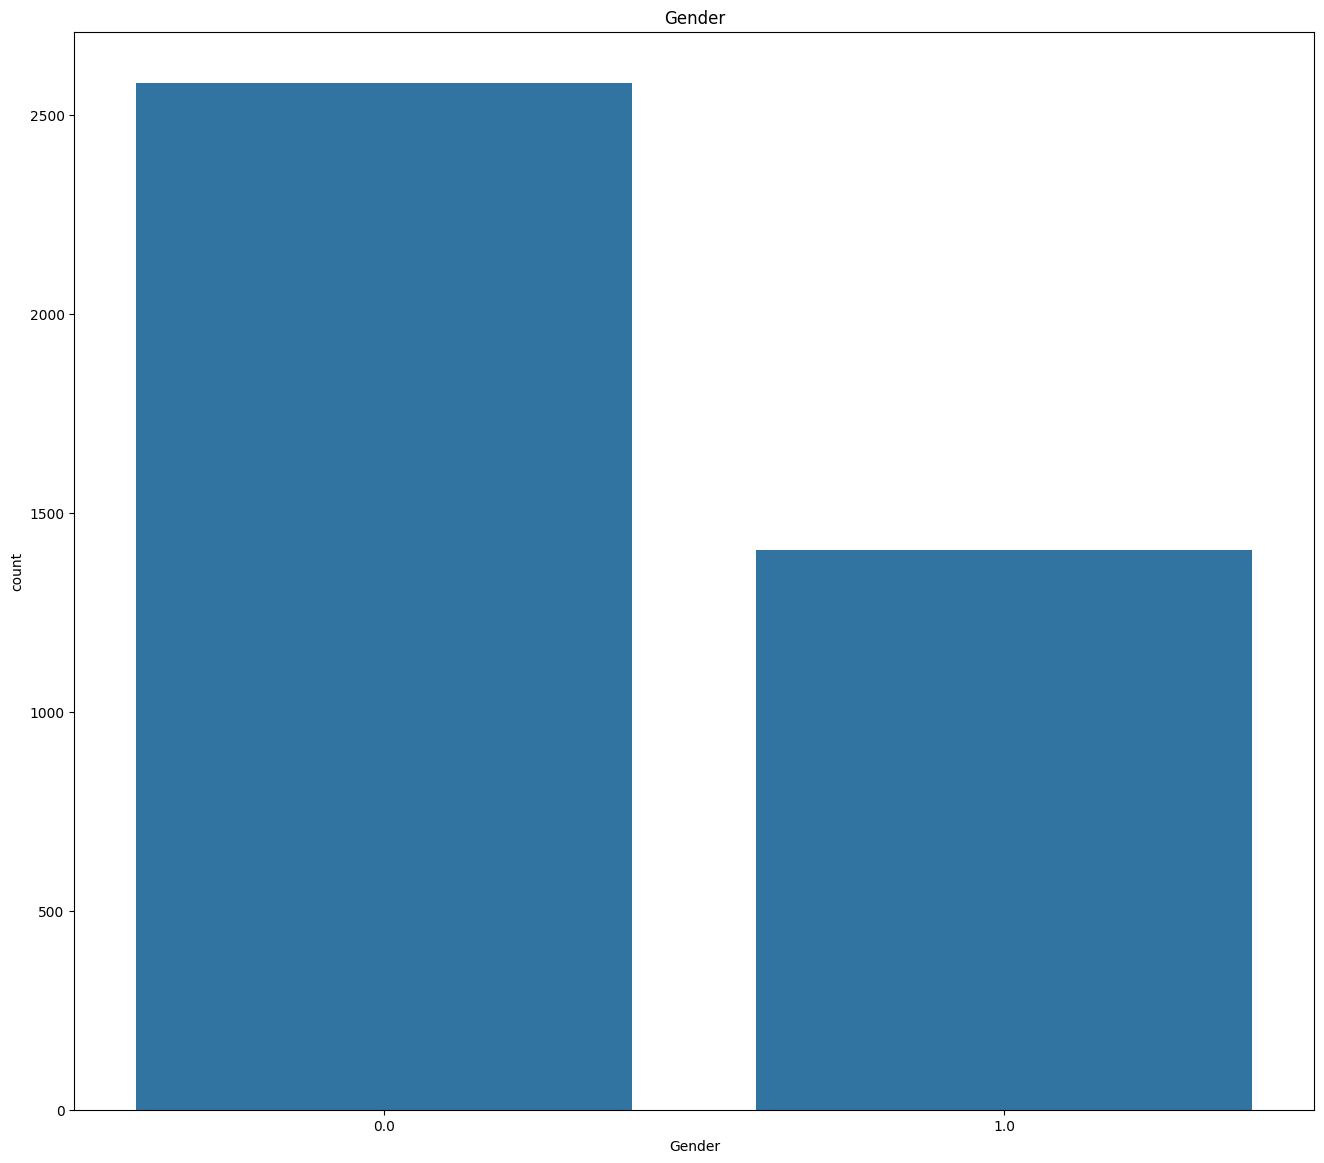

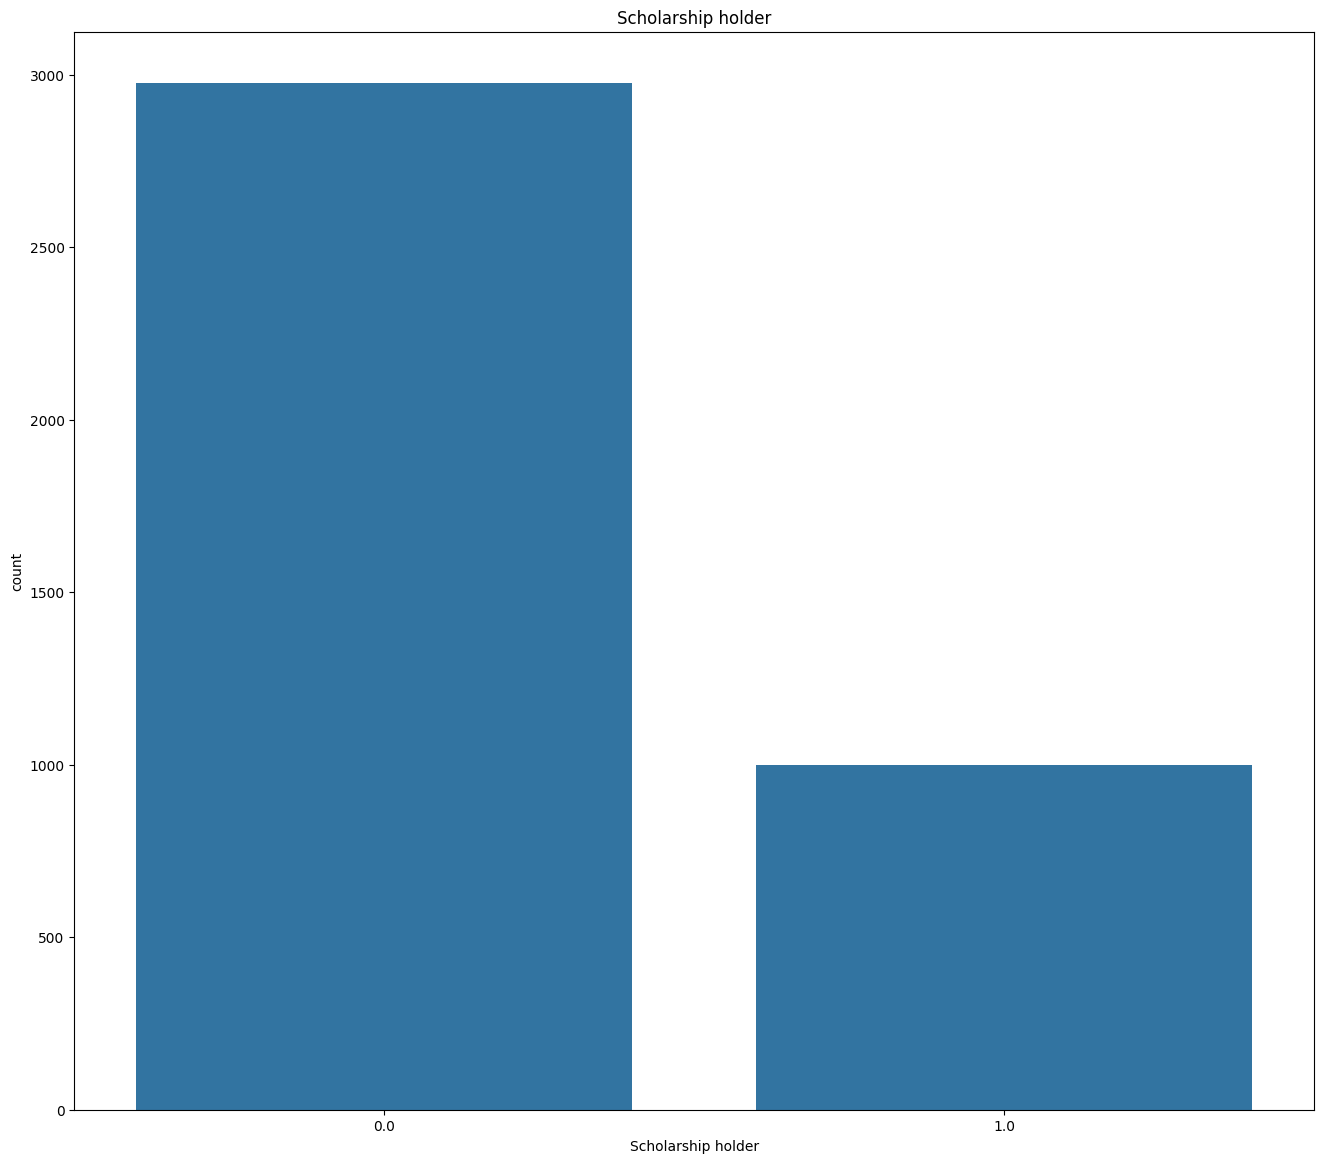

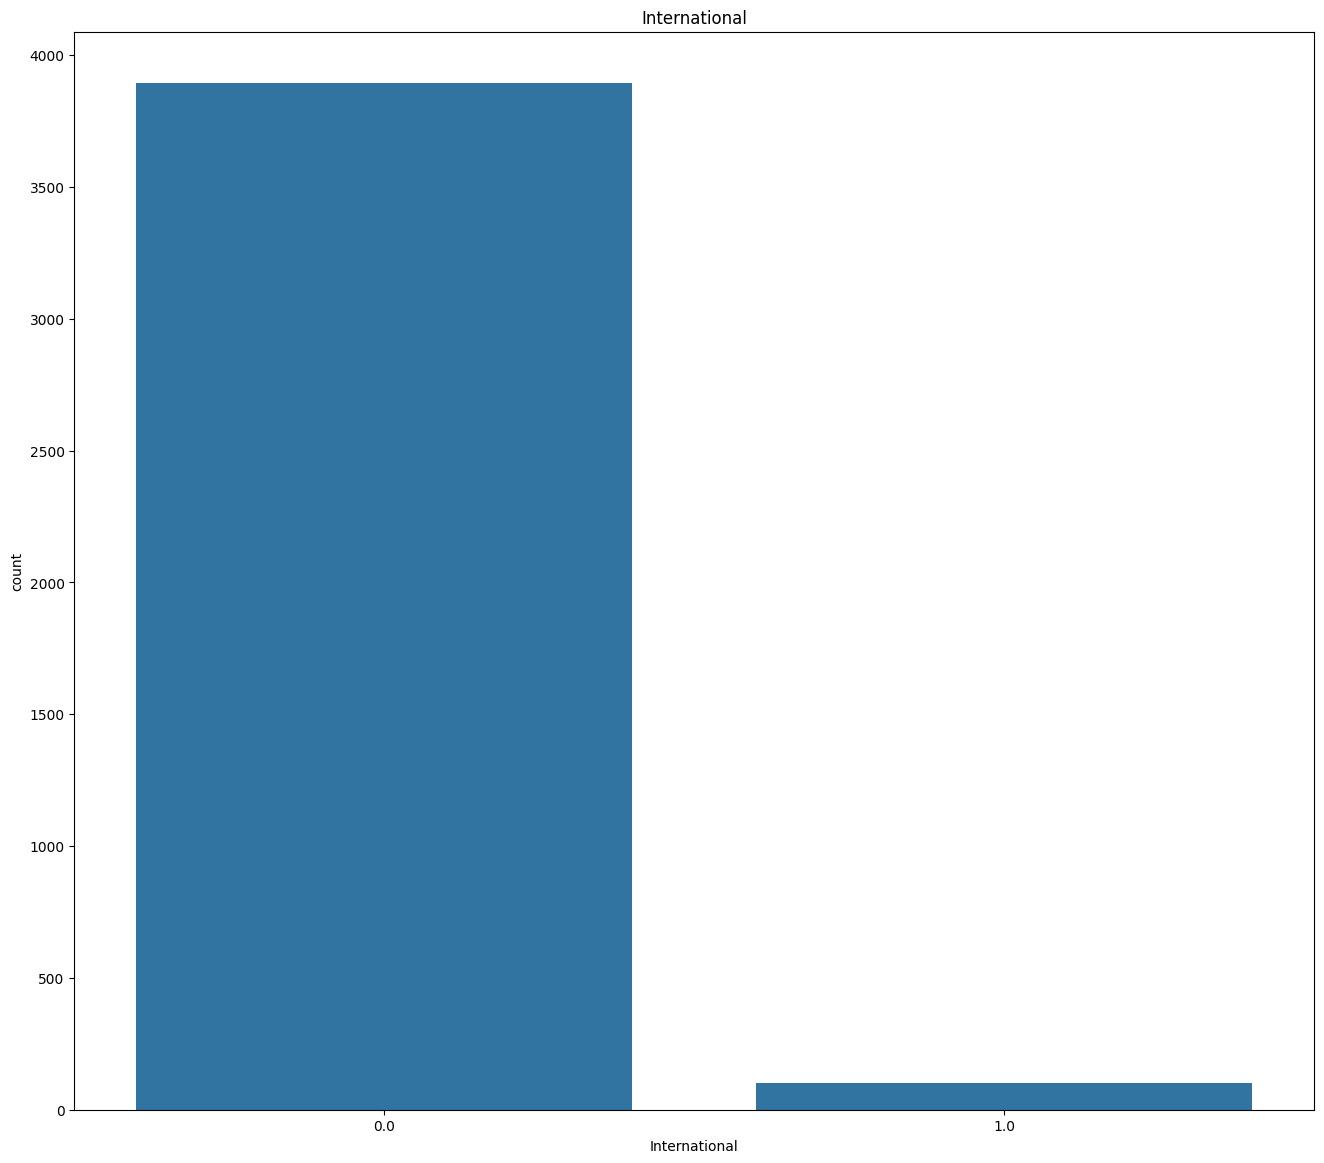

['Marital status', 'Application mode', 'Course', 'Daytime/evening attendance\t', 'Previous qualification', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International']


In [ ]:

for col in cat_feats:
    plt.figure(figsize=(16,14))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.xticks(rotation=0); plt.title(col); plt.show()
print(cat_feats)

# **Data‑Pre‑Processing Pipeline**
*Handles missing values → encodes categoricals → scales numerics.*

In [ ]:
drop_col = ['Target',"Father's qualification","Father's occupation","Mother's occupation"]

cat_feats = [
    "Marital status",
    "Application mode",
    "Course",
    "Daytime/evening attendance\t",
    "Previous qualification",
    "Nacionality",
    #"Mother's qualification",
     "Father's qualification",
    # "Mother's occupation",
    # "Father's occupation",
    "Displaced",
    "Educational special needs",
    "Debtor",
    "Tuition fees up to date",
    "Gender",
    "Scholarship holder",
    "International"
]

num_feats = [
    "Application order",
    "Previous qualification (grade)",
    "Admission grade",
    "Age at enrollment",
    "Unemployment rate",
    "Inflation rate",
    "GDP"
]

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# ▶ drop rows with missing Target
df = df.dropna(subset=['Target']).reset_index(drop=True)

X = df.drop(drop_col, axis=1)
y = df['Target']

numeric_pipeline = Pipeline(steps=[   #null
    ('imputer', SimpleImputer(strategy='median')), #null value khuje ber kore median
    ('scaler',  StandardScaler())
])

categorical_pipeline = Pipeline(steps=[    #cat
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot',  OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, num_feats),
        ('cat', categorical_pipeline, cat_feats)
    ])
#preprocessor = new data set organized
# train / test split for downstream modelling
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42)

# final ready‑to‑fit pipeline
print(preprocessor)
print(df.head)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Application order',
                                  'Previous qualification (grade)',
                                  'Admission grade', 'Age at enrollment',
                                  'Unemployment rate', 'Inflation rate',
                                  'GDP']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Marital status', 'Application mode',
  

# 8  Key Take‑aways
* Dataset has **24 predictor features** & **3 target classes**  
* It is a **classification** task (categorical ‘Target’).  
* Classes are **imbalanced** (Graduate > Dropout > Enrolled).  
* Highest linear correlations: e.g., ‘Admission grade’ vs ‘Previous qualification (grade)’.  
* Missing values present – handled via median / mode imputation.  
* Complete preprocessing pipeline built for reproducible research.

# **Neural network**

In [ ]:
!pip install -q xgboost scikeras[tensorflow]  # silent install (TF 2.x ships with Colab)

In [ ]:

import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay,
                             classification_report, roc_auc_score, roc_curve,
                             RocCurveDisplay)
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import tensorflow as tf
from scikeras.wrappers import KerasClassifier   # lets us keep a sklearn‑style API


In [ ]:
# ↳ code
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc  = le.transform(y_test)

num_classes = len(le.classes_)
y_train_bin = label_binarize(y_train_enc, classes=range(num_classes))
y_test_bin  = label_binarize(y_test_enc,  classes=range(num_classes))

print("Classes:", le.classes_)


Classes: ['Dropout' 'Enrolled' 'Graduate']


Build model‑factory so scikeras can re‑create it inside cross‑validation, etc.

Combine with the **exact same** `preprocessor`

In [ ]:
# ⬅ 1.  Make sure we have compatible library versions
#!pip install -q -U scikit-learn scikeras  # (installs sklearn >=1.3, scikeras >=0.12)

import tensorflow as tf, sklearn, scikeras
print("TF :", tf.__version__, "| sklearn :", sklearn.__version__, "| scikeras :", scikeras.__version__)


TF : 2.19.0 | sklearn : 1.4.2 | scikeras : 0.13.0


In [ ]:
# ⬅ 2.  Fit the preprocessor once
preprocessor.fit(X_train)
n_inputs = preprocessor.transform(X_train.iloc[[0]]).shape[1]


In [ ]:
# ⬅ 3.  Build the Keras model factory
def make_dense_nn(n_inputs, n_classes):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(n_inputs,)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(n_classes, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model


In [ ]:

from scikeras.wrappers import KerasClassifier
from sklearn.pipeline    import Pipeline

nn_clf = KerasClassifier(
    model=make_dense_nn,
    model__n_inputs=n_inputs,
    model__n_classes=num_classes,
    epochs=100,
    batch_size=64,
    validation_split=0.15,                 # ← gives EarlyStopping its 'val_loss'
    verbose=0,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor="val_loss", patience=8, restore_best_weights=True)
    ]
)

nn_pipe = Pipeline(steps=[
    ('prep', preprocessor),    # already fitted but harmless to reuse
    ('nn',   nn_clf)
])


history = nn_pipe.fit(X_train, y_train_enc)


Evaluate NN

Neural Network
              precision    recall  f1-score   support

     Dropout       0.63      0.56      0.59       382
    Enrolled       0.32      0.11      0.16       216
    Graduate       0.65      0.85      0.74       594

    accuracy                           0.62      1192
   macro avg       0.53      0.51      0.50      1192
weighted avg       0.58      0.62      0.59      1192



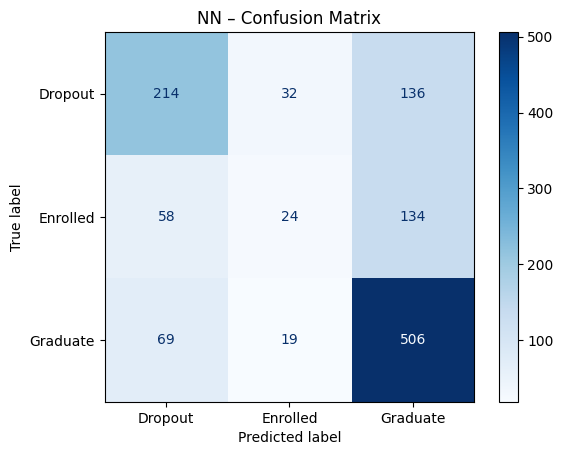

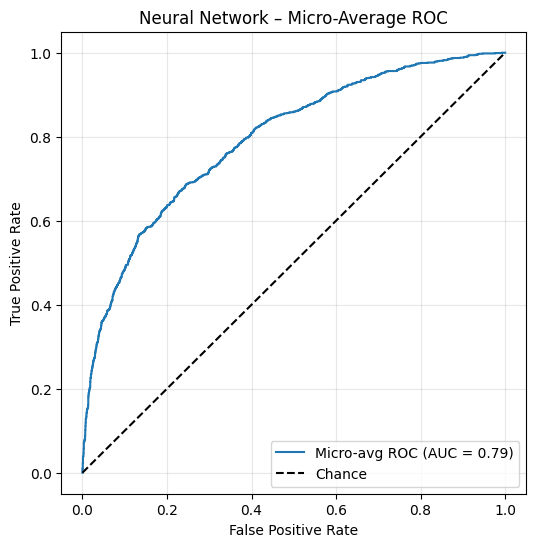

In [ ]:
# ↳ code
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
keras_model = nn_pipe.named_steps['nn'].model_
# 1️⃣  Pre-transform the test set once (already done)
X_test_trans = preprocessor.transform(X_test)

# 2️⃣  Pure Keras prediction
y_nn_pred_prob = keras_model.predict(X_test_trans, verbose=0)
y_nn_pred      = y_nn_pred_prob.argmax(axis=1)

# 3️⃣  Standard classification report & confusion matrix
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
print("Neural Network")
print(classification_report(y_test_enc, y_nn_pred, target_names=le.classes_))

cm = confusion_matrix(y_test_enc, y_nn_pred)
ConfusionMatrixDisplay(cm, display_labels=le.classes_).plot(cmap='Blues')
plt.title('NN – Confusion Matrix')
plt.show()

# 4️⃣  Compute micro-average ROC curve and AUC
y_true_flat  = y_test_bin.ravel()         # flatten one-vs-rest true labels
y_score_flat = y_nn_pred_prob.ravel()     # flatten predicted probabilities

fpr_micro, tpr_micro, _ = roc_curve(y_true_flat, y_score_flat)
auc_micro = roc_auc_score(
    y_test_bin, y_nn_pred_prob,
    multi_class='ovr',
    average='micro'
)

# 5️⃣  Plot the single micro-average ROC
plt.figure(figsize=(6, 6))
plt.plot(fpr_micro, tpr_micro,
         label=f"Micro-avg ROC (AUC = {auc_micro:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.title("Neural Network – Micro-Average ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


# **Decision Tree**

Decision Tree
              precision    recall  f1-score   support

     Dropout       0.51      0.47      0.49       382
    Enrolled       0.24      0.25      0.25       216
    Graduate       0.63      0.66      0.64       594

    accuracy                           0.52      1192
   macro avg       0.46      0.46      0.46      1192
weighted avg       0.52      0.52      0.52      1192



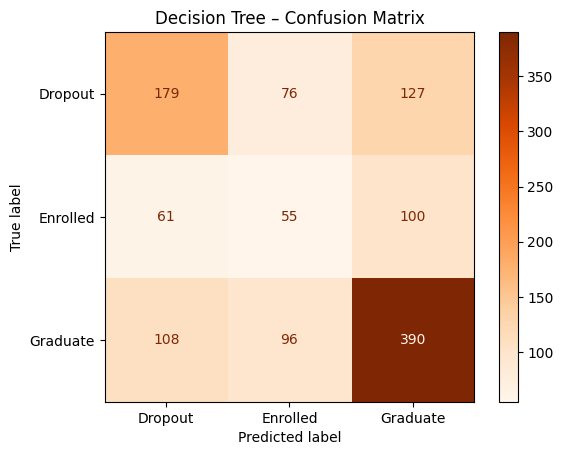

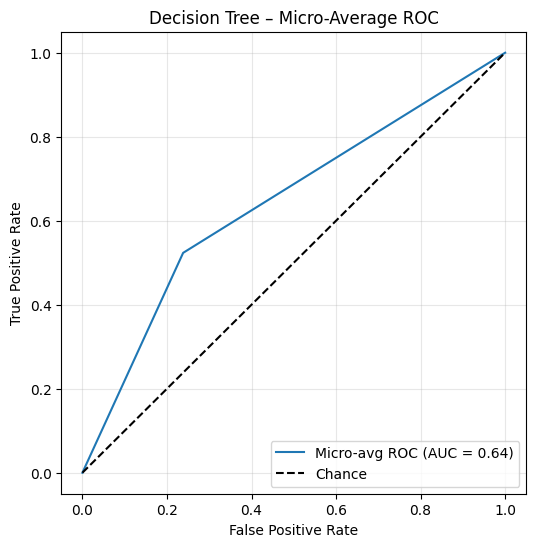

In [ ]:
# ↳ code
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline

# 1️⃣  Build & train Decision Tree pipeline
dt_pipe = Pipeline([
    ('prep', preprocessor),
    ('dt', DecisionTreeClassifier(
        criterion='gini',
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=1,
        class_weight='balanced',
        random_state=42
    ))
])
dt_pipe.fit(X_train, y_train_enc)

# 2️⃣  Predict & evaluate
y_dt_pred      = dt_pipe.predict(X_test)
y_dt_pred_prob = dt_pipe.predict_proba(X_test)

print("Decision Tree")
print(classification_report(y_test_enc, y_dt_pred, target_names=le.classes_))

cm = confusion_matrix(y_test_enc, y_dt_pred)
ConfusionMatrixDisplay(cm, display_labels=le.classes_).plot(cmap='Oranges')
plt.title("Decision Tree – Confusion Matrix")
plt.show()

# 3️⃣  Micro-average ROC
y_true_flat  = y_test_bin.ravel()
y_score_flat = y_dt_pred_prob.ravel()
fpr_micro, tpr_micro, _ = roc_curve(y_true_flat, y_score_flat)
auc_micro = roc_auc_score(y_test_bin, y_dt_pred_prob, multi_class='ovr', average='micro')

plt.figure(figsize=(6,6))
plt.plot(fpr_micro, tpr_micro, label=f"Micro-avg ROC (AUC = {auc_micro:.2f})")
plt.plot([0,1],[0,1],'k--', label='Chance')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Decision Tree – Micro-Average ROC")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


# **Logistic Regression**

Logistic Regression
              precision    recall  f1-score   support

     Dropout       0.62      0.54      0.58       382
    Enrolled       0.31      0.42      0.35       216
    Graduate       0.72      0.69      0.70       594

    accuracy                           0.59      1192
   macro avg       0.55      0.55      0.55      1192
weighted avg       0.61      0.59      0.60      1192



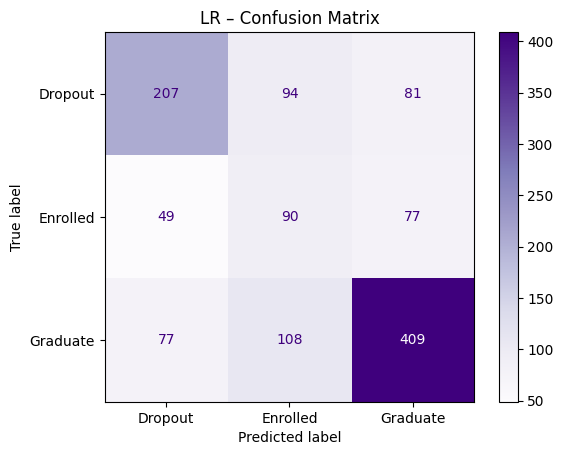

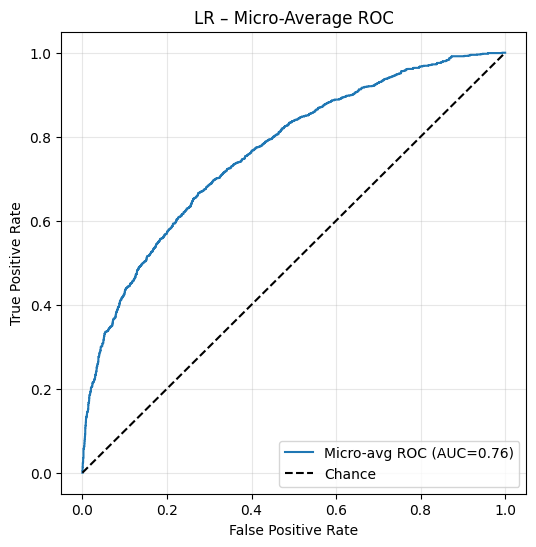

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, roc_auc_score
)

# 1) Drop the target and the two parental‐qualification cols from df
df2 = df.drop(drop_col, axis=1)
y   = df['Target']

# 2) Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    df2, y, test_size=0.3, stratify=y, random_state=42
)

# 3) Define your feature lists (minus the dropped ones!)

# 4) Build a preprocessor that outputs a **dense** array
numeric_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('scale',   StandardScaler())
])
categorical_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ohe',     OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])
preprocessor = ColumnTransformer([
    ('num', numeric_pipeline,   num_feats),
    ('cat', categorical_pipeline, cat_feats)
])

# 5) Fit & transform
X_train_pre = preprocessor.fit_transform(X_train)
X_test_pre  = preprocessor.transform(X_test)

# 6) Encode the target
le = LabelEncoder().fit(y_train)
y_train_enc = le.transform(y_train)
y_test_enc  = le.transform(y_test)

# 7) Binarize for ROC-AUC
y_train_bin = label_binarize(y_train_enc, classes=range(len(le.classes_)))
y_test_bin  = label_binarize(y_test_enc,  classes=range(len(le.classes_)))

# 8) Train logistic regression
lr = LogisticRegression(
    max_iter=1000, class_weight='balanced',
    solver='lbfgs', multi_class='ovr', n_jobs=-1
)
lr.fit(X_train_pre, y_train_enc)

# 9) Predict & evaluate
y_lr_pred      = lr.predict(X_test_pre)
y_lr_prob      = lr.predict_proba(X_test_pre)

print("Logistic Regression")
print(classification_report(y_test_enc, y_lr_pred, target_names=le.classes_))

ConfusionMatrixDisplay.from_predictions(
    y_test_enc, y_lr_pred, display_labels=le.classes_, cmap='Purples'
)
plt.title("LR – Confusion Matrix")
plt.show()

# 10) Single micro-avg ROC
fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_lr_prob.ravel())
auc_micro   = roc_auc_score(y_test_bin, y_lr_prob, multi_class='ovr', average='micro')

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"Micro-avg ROC (AUC={auc_micro:.2f})")
plt.plot([0,1],[0,1],'k--', label="Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("LR – Micro-Average ROC")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


**K means**

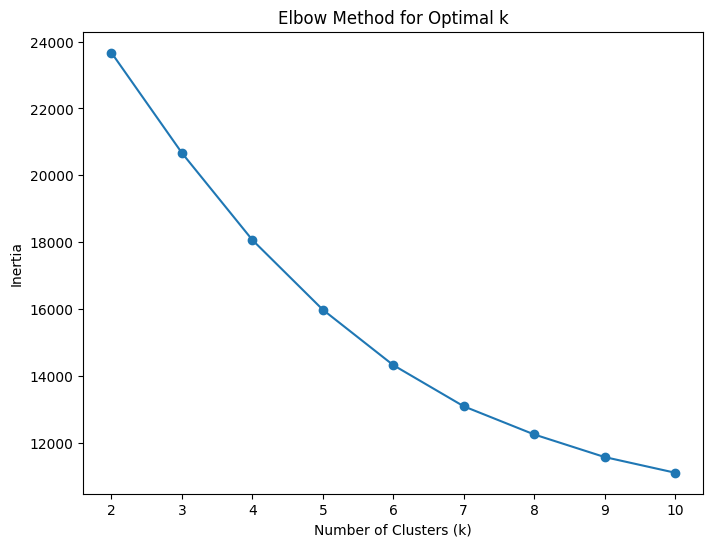

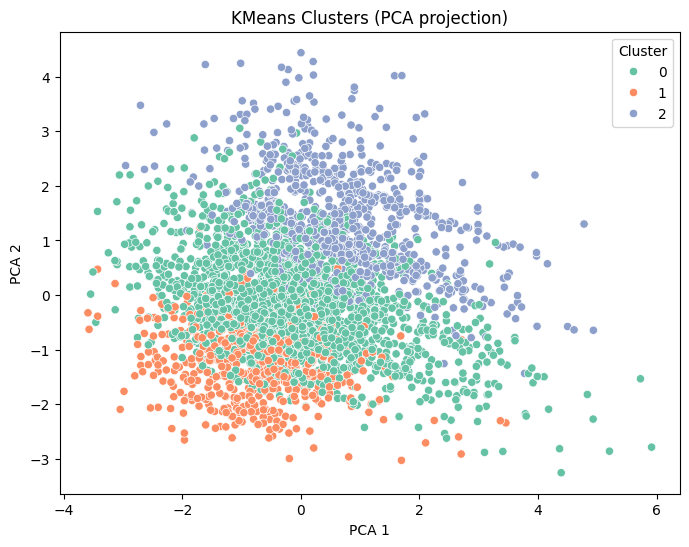

         Application order  Previous qualification (grade)  Admission grade  \
Cluster                                                                       
0                 1.169919                      132.396997       127.178695   
1                 4.224329                      131.317491       124.650811   
2                 1.272834                      134.179553       127.518888   

         Age at enrollment  Unemployment rate  Inflation rate       GDP  
Cluster                                                                  
0                23.894540          10.454767        0.808525  0.846538  
1                19.243007          10.728142        1.047803  0.542791  
2                24.350816          14.753975        2.402442 -2.320965  


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline


# ===========================
#  Preprocessing
# ===========================
# Drop non-numeric columns if any (this is now handled by the numeric pipeline below)
# numeric_df = df.select_dtypes(include=["int64", "float64"]) # Remove this line

# Create a pipeline for numeric preprocessing including imputation and scaling
numeric_clustering_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), # Impute missing values
    ('scaler',  StandardScaler())                  # Scale the data
])


# Apply the numeric pipeline to the numeric features defined earlier
# Ensure that num_feats contains only columns that should be used for clustering
# Based on the original num_feats and the EDA, these seem appropriate for clustering.
scaled_data = numeric_clustering_pipeline.fit_transform(df[num_feats])


# ===========================
#  Apply KMeans
# ===========================
inertia = []
K = range(2, 11)  # test cluster sizes from 2–10

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Elbow plot
plt.figure(figsize=(8,6))
plt.plot(K, inertia, "o-")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

# ===========================
#  Train Final Model
# ===========================
optimal_k = 3  #inspect elbow
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(scaled_data)

df["Cluster"] = clusters

# ===========================
#  Visualize with PCA
# ===========================
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_data[:,0], y=pca_data[:,1], hue=clusters, palette="Set2")
plt.title("KMeans Clusters (PCA projection)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.show()

# ===========================
# 6. Cluster Analysis
# ===========================
cluster_summary = df.groupby("Cluster")[num_feats].mean() # Only include num_feats for mean calculation
print(cluster_summary)

**Comparsion Analysis**

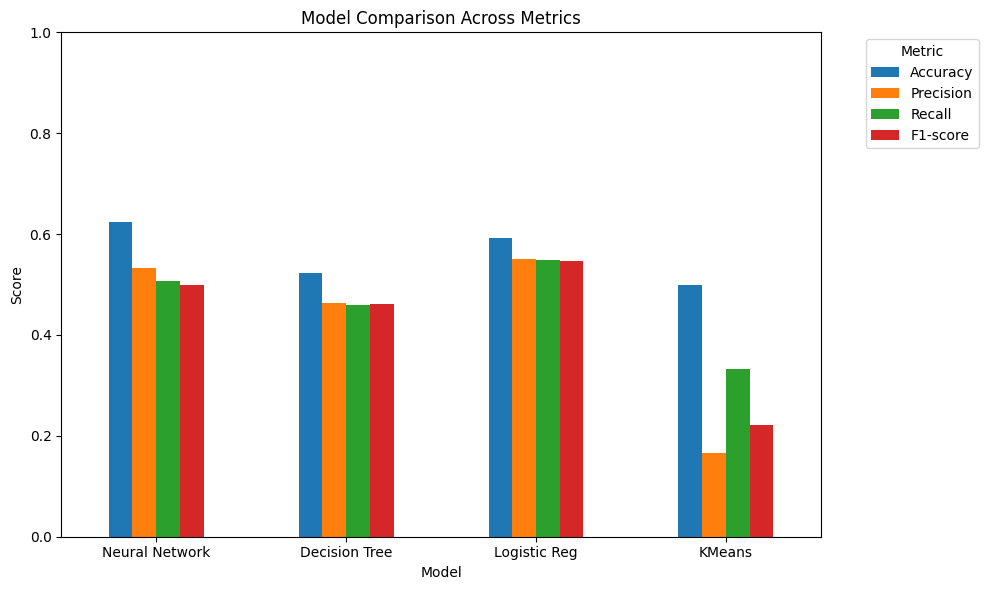

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

# 1) Collect predictions into a dict
model_preds = {
    "Neural Network": y_nn_pred,
    "Decision Tree": y_dt_pred,
    "Logistic Reg": y_lr_pred,
    "KMeans": clusters[y_test.index.values] # Use the cluster assignments from the KMeans step
}

# Map cluster labels to target labels for KMeans evaluation
# This assumes that there is some correspondence between the clusters and the target classes.
# A more robust approach would be to analyze the cluster centroids and their distribution among target classes.
le = LabelEncoder()
y_test_enc_kmeans = le.fit_transform(y_test)

# Create a mapping from cluster ID to the most frequent true label in that cluster
cluster_to_label = {}
for cluster_id in df['Cluster'].unique():
    subset = df[df['Cluster'] == cluster_id]
    if not subset.empty:
        most_frequent_label = subset['Target'].mode()
        if not most_frequent_label.empty:
            cluster_to_label[cluster_id] = le.transform([most_frequent_label[0]])[0]

# Map KMeans predictions to the encoded target labels
kmeans_mapped_preds = np.array([cluster_to_label.get(cluster_id, -1) for cluster_id in model_preds["KMeans"]]) # -1 for clusters not in mapping


# 2) Compute metrics for each
rows = []
for name, preds in model_preds.items():
    if name == "KMeans":
        # Use the mapped predictions for KMeans
        rows.append({
            "Model":     name,
            "Accuracy":  accuracy_score(y_test_enc_kmeans, kmeans_mapped_preds),
            "Precision": precision_score(y_test_enc_kmeans, kmeans_mapped_preds, average="macro", zero_division=0),
            "Recall":    recall_score(y_test_enc_kmeans, kmeans_mapped_preds, average="macro", zero_division=0),
            "F1-score":  f1_score(y_test_enc_kmeans, kmeans_mapped_preds, average="macro", zero_division=0)
        })
    else:
        rows.append({
            "Model":     name,
            "Accuracy":  accuracy_score(y_test_enc, preds),
            "Precision": precision_score(y_test_enc, preds, average="macro", zero_division=0),
            "Recall":    recall_score(y_test_enc, preds, average="macro", zero_division=0),
            "F1-score":  f1_score(y_test_enc, preds, average="macro", zero_division=0)
        })


metrics_df = pd.DataFrame(rows).set_index("Model")

# 3) Plot grouped bar chart
ax = metrics_df.plot(
    kind="bar",
    figsize=(10, 6),
    ylabel="Score",
    ylim=(0, 1.0),
    rot=0
)
plt.title("Model Comparison Across Metrics")
plt.legend(title="Metric", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

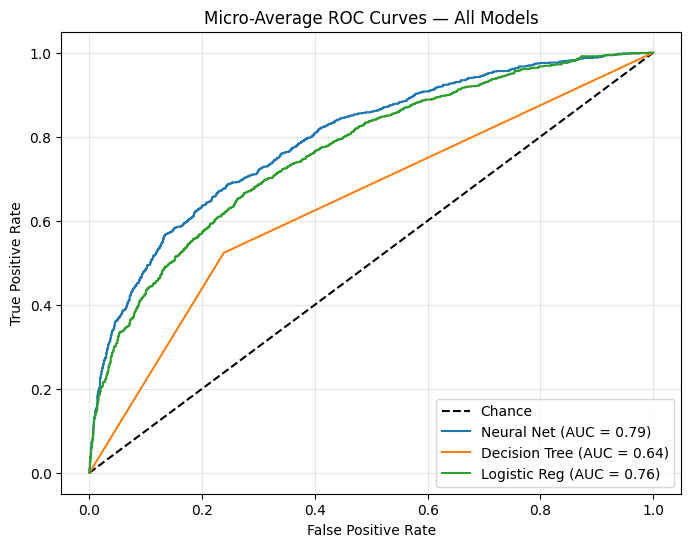

In [ ]:

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score


model_probs = {
    "Neural Net":     y_nn_pred_prob,
    "Decision Tree":  y_dt_pred_prob,
    "Logistic Reg":   y_lr_prob,
}

# 2) Plot all micro-average ROC curves together
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'k--', label='Chance')

for name, prob in model_probs.items():
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), prob.ravel())
    auc = roc_auc_score(y_test_bin, prob, multi_class='ovr', average='micro')
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

plt.title("Micro-Average ROC Curves — All Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()
